In [1]:
cd ..

/Users/ulfaslak/Dropbox/MSc/sem12/MScProject/Academic/code/pipeline_code


In [217]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})  # <-- STYLE
import numpy as np
import pandas as pd
import json
from collections import defaultdict, Counter
from datetime import datetime as dt
import random
from random import choice, shuffle, sample

# Regression
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn import gaussian_process
from sklearn.svm import SVR

# Classification
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Parameter tuning

from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

from build_dataset.analysis.compute_thetas import compute_thetas

In [61]:
## General variables
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"
tc = "tc1_spring"

## General dictionaries
with open('globals/feature_name_map.json') as infile:
    feature_name_map = json.load(infile)
with open('globals/super_traits.json') as infile:
    super_traits = json.load(infile)
with open('globals/trait_sign.json') as infile:
    trait_sign = json.load(infile)

## Load data
Xtz = np.loadtxt("data/Xtz_%s.csv" % tc, delimiter=",")
Y = np.loadtxt("data/Y_%s.csv" % tc, delimiter=",")
Q = np.loadtxt("data/Q_%s.csv" % tc, delimiter=",")
M = np.loadtxt("data/M_%s.csv" % tc, delimiter=",")
D = np.loadtxt("data/D_%s.csv" % tc, delimiter=",")
D_consensus = compute_thetas(Y, penalty='consensus', return_D=True)
D_std = compute_thetas(Y, penalty='std', return_D=True)
D_var = compute_thetas(Y, penalty='var', return_D=True)
D_None = compute_thetas(Y, penalty=None, return_D=True)

Xtz_clean_svm = np.loadtxt("data/Xtz_%s_clean_svm.csv" % tc, delimiter=",")
Xtz_clean_kd = np.loadtxt("data/Xtz_%s_clean_kd.csv" % tc, delimiter=",")

Xtz_clean_svm_valid_users = np.loadtxt("data/XtzYM_%s_clean_svm_valid_users.csv" % tc, delimiter=",")
Xtz_clean_kd_valid_users = np.loadtxt("data/XtzYM_%s_clean_kd_valid_users.csv" % tc, delimiter=",")

Y_clean_kd = np.loadtxt("data/Y_%s_clean_kd.csv" % tc, delimiter=",")
Y_clean_svm = np.loadtxt("data/Y_%s_clean_svm.csv" % tc, delimiter=",")
Q_clean_kd = np.loadtxt("data/Q_%s_clean_kd.csv" % tc, delimiter=",")
Q_clean_svm = np.loadtxt("data/Q_%s_clean_svm.csv" % tc, delimiter=",")
M_clean_kd = np.loadtxt("data/M_%s_clean_kd.csv" % tc, delimiter=",")
M_clean_svm = np.loadtxt("data/M_%s_clean_svm.csv" % tc, delimiter=",")
D_clean_kd = np.loadtxt("data/D_%s_clean_kd.csv" % tc, delimiter=",")
D_clean_svm = np.loadtxt("data/D_%s_clean_svm.csv" % tc, delimiter=",")

feat_names = np.load("data/X_2014_%s_feat_names_sorted.pickle" % None)
    
## General functions
def cl(f):
    return '_'.join(('_'.join(f.split("__allweek__allday__"))).split("__"))
def cp(f):
    return ' '.join([w.capitalize() for w in f.split('_')])
def trytrytry(func):
    """Simple decorator to run functions till they return without error."""
    def wrapper(*args):
        while True:
            try:
                return func(*args)
            except KeyboardInterrupt:
                break
            except:
                pass
    return wrapper

## Regression

In [159]:
N_cv = Y.shape[0] / 10

for i in range(Y.shape[1]):
    score = []
    for fold in range(10):
        test = range(N_cv * fold, N_cv * (fold+1))
        train = list(set(range(Y.shape[0])) - set(test))
        lm = LR().fit(Xtz[train, :], Y[train, i])
        score.append(lm.score(Xtz[test, :], Y[test, i]))
    print np.mean(score)

-0.116088739266
-0.0743424719869
0.00475711079638
-0.170414751731
-0.088934985236


#### Conclusion: Regression does not work!

# PCA of Q 

In [156]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(Q)
Q_pca = pca.transform(Q)

In [157]:
big5_map = {"bfi_talk": {"dim": "E", "reversed": False},"bfi_error": {"dim": "A", "reversed": True},"bfi_work": {"dim": "C", "reversed": False},"bfi_depressed": {"dim": "N", "reversed": False},"bfi_original": {"dim": "O", "reversed": False},"bfi_reserved": {"dim": "E", "reversed": True},"bfi_helpfull": {"dim": "A", "reversed": False},"bfi_careless": {"dim": "C", "reversed": True},"bfi_relaxed": {"dim": "N", "reversed": True},"bfi_currious": {"dim": "O", "reversed": False},"bfi_energi": {"dim": "E", "reversed": False},"bfi_fight": {"dim": "A", "reversed": True},"bfi_reliable": {"dim": "C", "reversed": False},"bfi_tense": {"dim": "N", "reversed": False},"bfi_creative": {"dim": "O", "reversed": False},"bfi_enthusiasm": {"dim": "E", "reversed": False},"bfi_forgive": {"dim": "A", "reversed": False},"bfi_disorderly": {"dim": "C", "reversed": True},"bfi_worry": {"dim": "N", "reversed": False},"bfi_imagination": {"dim": "O", "reversed": False},"bfi_quiet": {"dim": "E", "reversed": True},"bfi_confident": {"dim": "A", "reversed": False},"bfi_lazy": {"dim": "C", "reversed": True},"bfi_stable": {"dim": "N", "reversed": True},"bfi_inventive": {"dim": "O", "reversed": False},"bfi_strong_personality": {"dim": "E", "reversed": False},"bfi_cold": {"dim": "A", "reversed": True},"bfi_hold_on": {"dim": "C", "reversed": False},"bfi_unbalanced": {"dim": "N", "reversed": False},"bfi_art": {"dim": "O", "reversed": False},"bfi_shy": {"dim": "E", "reversed": True},"bfi_caring": {"dim": "A", "reversed": False},"bfi_effective": {"dim": "C", "reversed": False},"bfi_calm": {"dim": "N", "reversed": True},"bfi_rutine": {"dim": "O", "reversed": True},"bfi_social": {"dim": "E", "reversed": False},"bfi_rude": {"dim": "A", "reversed": True},"bfi_nervous": {"dim": "C", "reversed": False},"bfi_play": {"dim": "O", "reversed": False},"bfi_few_art": {"dim": "O", "reversed": True},"bfi_coorporation": {"dim": "A", "reversed": False},"bfi_distract": {"dim": "C", "reversed": True},"bfi_taste_art": {"dim": "O", "reversed": False}}
big5_order = ["bfi_talk", "bfi_error", "bfi_work", "bfi_depressed", "bfi_original", "bfi_reserved", "bfi_helpfull", "bfi_careless", "bfi_relaxed", "bfi_currious", "bfi_energi", "bfi_fight", "bfi_reliable", "bfi_tense", "bfi_creative", "bfi_enthusiasm", "bfi_forgive", "bfi_disorderly", "bfi_worry", "bfi_imagination", "bfi_quiet", "bfi_confident", "bfi_lazy", "bfi_stable", "bfi_inventive", "bfi_strong_personality", "bfi_cold", "bfi_hold_on", "bfi_unbalanced", "bfi_art", "bfi_shy", "bfi_caring", "bfi_effective", "bfi_calm", "bfi_rutine", "bfi_social", "bfi_rude", "bfi_nervous", "bfi_play", "bfi_few_art", "bfi_coorporation", "bfi_distract", "bfi_taste_art"]

bfi = np.empty((5, 43))
for i, tra in enumerate(['O', 'C', 'E', 'A', 'N']):
    d = big_five_components[tra]
    vec = [0]*43
    for j, tr in enumerate(big5_order):
        if big5_map[tr]['dim'] == tra:
            if not big5_map[tr]['reversed']:
                vec[j] = 1
            if big5_map[tr]['reversed']:
                vec[j] = -1
                
    bfi[i, :] = np.array(vec)

## Supervised learning

In [448]:
def progress_percentage(i, c, N):
    if i * 1.0 / N >= c*0.1:
        print "%d%%" % (c*10), "",
        c += 1
    return c

def printarr(arr):
    outstr = "[ "
    for a in arr:
        nextstr = "%.02f" % a
        outstr += " " * (7 - len(nextstr))
        outstr += nextstr
    outstr += "   ]"
    return outstr

def get_classes(Y, num_classes=2, balanced=True, return_thresholds=False):
    """Balanced must be false for archetype resemblance because median is sometimes 0!"""
    
    if balanced is True:
        thresholds = [sorted(Y)[int(i-1)] for i in np.arange(0, len(Y)+1e-9, len(Y)*1.0 / num_classes)[1:-1]]
    elif balanced is False:
        y_min, y_max = min(Y), max(Y)
        thresholds = np.arange(y_min, y_max+1e-9, (y_max - y_min) * 1.0 / num_classes)[1:-1]  # small value added to include end threshold
    elif balanced=="normal":
        thresholds = [np.mean(Y) - np.std(Y)/2, np.mean(Y) + np.std(Y)/2]
    else:
        print "WARNING: No valid input for 'balanced', raising error."
        raise
    
    # >>> print num_classes, len(thresholds)
    # 3 2
    
    a = []
    for y in Y:
        for i, thr in enumerate(thresholds):
            if y < thr:
                a.append(i)
                break
        else:
            a.append(i+1)
    
    if not return_thresholds:
        return np.array(a)
    return np.array(a), thresholds

In [583]:
## Parameter tuning for each classification problem.
    
def parameter_tuning(X, y, n_search_iter=100, n_iter=5, param1='max_features', param2='n_estimators', savelabel=None):
    """Tune parameters with random and grid search."""
    
    ## ------------- ##
    ## Random search ##
    ## ------------- ##
    
    # specify parameters and distributions to sample from
    param_dist = {
        "n_estimators": sp_randint(10, 100),
        "min_samples_split": sp_randint(2, 13),
        "max_depth": sp_randint(3, 6),
        "min_samples_leaf": sp_randint(1, 10),
        "bootstrap": [True, False],
        "criterion": ["entropy", "gini"],
        "max_features": sp_randint(2, 38)
    }

    clf = RandomForestClassifier()
    cv = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=0.2, random_state=42)
    
    # run randomized search
    random_search = RandomizedSearchCV(
        clf,
        param_distributions=param_dist,
        n_iter=n_search_iter,
        cv=cv
    )

    start = time()
    random_search.fit(X, y)
    
    ##print "Random search time:", time() - start, "s"
    
    ## ------------------------------------------------- ##
    ## Grid search in range of random search best result ##
    ## ------------------------------------------------- ##
    
    def range_around(val, maxval=np.inf):
        vals = filter(
            lambda v: 0 < v < maxval,
            sorted(set([int(val * (1 - 1/10.0*(n-5))) for n in range(10)]))
        )

        if len(vals) < 10:
            i = 0
            while len(vals) < 10:
                if i % 2 == 0 and min(vals) > 1:
                    vals.insert(0, min(vals)-1)
                if i % 2 == 1 and max(vals) < maxval:
                    vals.append(max(vals)+1)
                i += 1

        return vals
    
    # get only best result from random search
    param_grid = sorted(random_search.grid_scores_, key=itemgetter(1), reverse=True)[0][0]
    
    ##print "best random search parameters:", param_grid

    # convert two paramters to ranges around best from random search
    param_grid[param1] = range_around(param_grid[param1], maxval=38)
    param_grid[param2] = range_around(param_grid[param2])

    # convert remaining parameters to lists with single element
    param_grid = dict((k, [v]) if type(v) != list else (k, v) for (k, v) in param_grid.items())
    
    ##print "DEBUG: grid parameters:", param_grid

    # fit grid search
    start = time()
    cv = StratifiedShuffleSplit(y, n_iter=n_iter, test_size=0.2, random_state=42)
    gridrf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
    gridrf.fit(X, y)

    ##print("The best parameters are %s with a score of %0.4f. Time %d seconds"
    ##      % (gridrf.best_params_, gridrf.best_score_, time() - start))

    ## --------------------- ##
    ## Visualize grid search ##
    ## --------------------- ##
    
    class MidpointNormalize(Normalize):
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            Normalize.__init__(self, vmin, vmax, clip)
        def __call__(self, value, clip=None):
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y))

    scores = np.array(
        [x[1] for x in gridrf.grid_scores_]
    ).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel(param2, fontsize=16)
    plt.ylabel(param1, fontsize=16)
    cb = plt.colorbar() # grab the Colorbar instance
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(14)
    plt.xticks(np.arange(len(param_grid[param2])), param_grid[param2], rotation=45, fontsize=14)
    plt.yticks(np.arange(len(param_grid[param1])), param_grid[param1], fontsize=14)
    plt.title(savelabel, fontsize=16, fontweight='bold')
    
    if savelabel is None:
        plt.show()
    else:
        plt.savefig(FIGPATH + "parameter_tuning/" + savelabel + ".pdf")
    
    best_model = sorted(gridrf.grid_scores_, key=lambda x: x[1], reverse=True)[0]
    baseline = max(Counter(y).values()) * 1.0 / sum(Counter(y).values())
    
    return best_model[0], best_model[1], np.std(best_model[2]), baseline

#best_params, best_score, best_score_std, baseline = parameter_tuning(
#    Xtz, 
#    get_classes(Y[:, 4], num_classes=3, balanced=True),
#    n_iter=5,
#    n_search_iter=10,
#    savelabel="test"
#)

In [626]:
def cv_fold(Y, split_fraction, stratified):
    if not stratified:
        train = sample(set(range(len(Y))), int(len(Y) * 0.8))
        test = list(set(range(len(Y))) - set(train))
    if stratified:
        Y_tr = np.array(sample(set(range(len(Y))), int(len(Y) * split_fraction)))
        Y_te = np.array(list(set(range(len(Y))) - set(Y_tr)))
        num_classes = len(set(Y))
        num_in_class = int(len(Y) * split_fraction / len(set(Y)))
        
        train = []
        for i in range(num_classes):
            Y_tr_i = Y_tr[Y[Y_tr]==i]
            for _ in range(len(Y_tr) / num_classes * 2):  # sample class i from Y num_in_class times
                train.append(choice(Y_tr_i))
        
        test = []
        for i in range(num_classes):
            Y_te_i = Y_te[Y[Y_te]==i]
            for _ in range(len(Y_te) / num_classes * 2):  # sample class i from Y num_in_class times
                test.append(choice(Y_te_i))
                    
    return list(train), list(test)

def classifier_score(X, Y, folds, stratified, num_classes, params={}, rich_output=False, balance_classes=True):
    
    # parallel computing
    params.update({'n_jobs': -1})
    
    # fold scores and feat-importances
    score = []
    feat_importance = []
    
    # class labels and class thresholds in original Y values
    Y, thresholds = get_classes(Y, num_classes=num_classes, balanced=balance_classes, return_thresholds=True)
    
    class_score = np.empty((3, num_classes, folds))
    shitcounter = 0
    for fold in range(folds):
        train, test = cv_fold(Y, split_fraction=0.8, stratified=stratified)
        clf = RandomForestClassifier(**params).fit(X[train, :], Y[train])
        Y_pred = clf.predict(X[test, :])
        fold_class_score = np.zeros((3, num_classes))
        for y_pred, y in zip(Y_pred, Y):
            if y_pred == y:
                fold_class_score[0, y] += 1
            fold_class_score[1, y_pred] += 1
            fold_class_score[2, y] += 1
        class_score[:, :, fold] = fold_class_score
        
        if np.sum([0 if y == Y_pred[0] else 1 for y in Y_pred]) == 0:
            shitcounter += 1
            
        score.append(np.sum(Y_pred == Y[test]) * 1.0 / len(Y[test]))
        feat_importance.append(clf.feature_importances_)
    
    if shitcounter > 0:
        print "| WARNING: %d / %d uniform classifications" % (shitcounter, folds)
    
    baseline = max(Counter(Y).values()) * 1.0 / sum(Counter(Y).values())
    
    if not rich_output:
        return np.mean(score)
    
    return np.mean(score), np.std(score), baseline, np.mean(class_score, axis=2), zip(np.mean(feat_importance, axis=0), np.std(feat_importance, axis=0)), thresholds




def print_classifier_scores(X, T, label, tune_params=False, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=False):
    profiles = {
        'arc': ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"],
        'tra': ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"],
        'pca': ["PC%d" % (pc+1) for pc in range(T.shape[1])]
        }[label]
    
    for i in range(T.shape[1]):
        
        print "## " + "-" * len(profiles[i]) + " ##"
        print "##", profiles[i].upper(), "##"
        print "## " + "-" * len(profiles[i]) + " ##\n"
        
        if label=="pca":
            print "| Inner products with Big Five traits [OCEAN] [  %.03f  %.03f  %.03f  %.03f  %.03f  ]" % tuple([np.dot(pca.components_[i], bfi[j]) for j in range(5)]),
        
        if tune_params:
            y, thresholds = get_classes(T[:, i], num_classes=num_classes, balanced=balanced_classes, return_thresholds=True)
            params, score_mean, score_std, baseline = parameter_tuning(X, y, savelabel=profiles[i], n_iter=folds)
            print "Model parameters:", json.dumps(params, indent=4)
        else:
            params = {}
            score_mean, score_std, baseline, class_score, feat_importance, thresholds = classifier_score(X, T[:, i], folds=folds, params=params, stratified=stratified, num_classes=num_classes, rich_output=True, balance_classes=balanced_classes)
        
        if visualize:
            # Histogram with decision boundaries
            plt.figure(figsize=(4.5, 3))
            sns.kdeplot(T[:, i]+1)
            for thr in thresholds:
                plt.plot([thr+1, thr+1], [0, 0.9], c="gray")
            plt.xticks([1, 2, 3, 4, 5], fontsize=16)
            plt.yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=16)
            plt.ylim([0,0.9])
            #plt.xlabel(profiles[i], fontsize=16)
            #plt.ylabel("Kernel density", fontsize=16)
            plt.tight_layout()
            #plt.savefig(FIGPATH + "trait_distributions/" + profiles[i] + ".pdf")
            plt.show()
            
        #print "Positives:     ", printarr(class_score[1])
        #print " True positives:", printarr(class_score[0])
        #print " Distribution:  ", printarr(class_score[2])
        #print
        print "Accuracy: " + "%.4f " % score_mean + "+-%.4f" % score_std, "| Baseline: %.4f" % baseline, "| Relative accuracy:", '\x1b[1;31m' + '%.4f ' % (score_mean-baseline) + '\x1b[0m'
        #print json.dumps(
        #    [(feature_name_map[feat_names[j]], "%.4f +-%.4f" % s) for j, s in sorted(enumerate(feat_importance), key=lambda x: x[1][0])[-5:]],
        #    indent=4
        #    )
        print

## -------- ##
## OPENNESS ##
## -------- ##


## ----------------- ##
## CONSCIENTIOUSNESS ##
## ----------------- ##


## ------------ ##
## EXTRAVERSION ##
## ------------ ##


## ------------- ##
## AGREEABLENESS ##
## ------------- ##


## ----------- ##
## NEUROTICISM ##
## ----------- ##




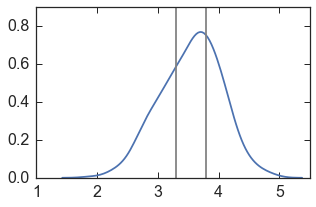

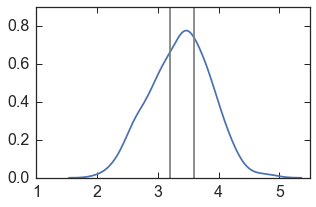

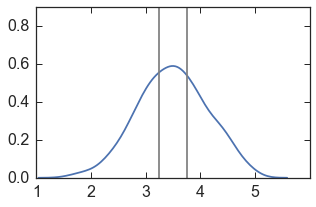

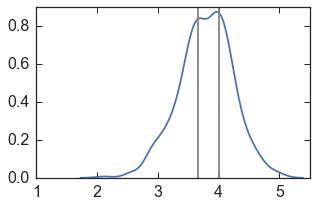

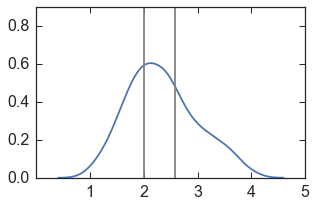

In [625]:
print_classifier_scores(Xtz, Y, "tra", tune_params=True, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

## -------- ##
## OPENNESS ##
## -------- ##
Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 2, 
    "n_estimators": 8, 
    "min_samples_split": 7, 
    "criterion": "entropy", 
    "max_features": 6, 
    "max_depth": 5
}


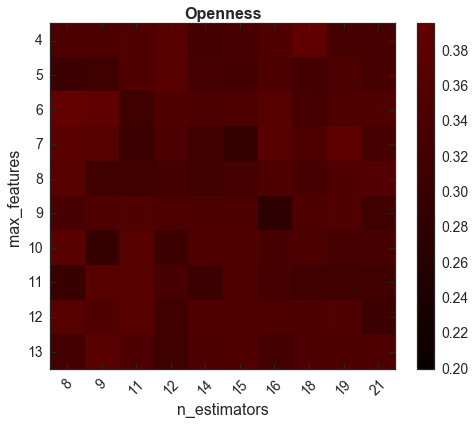

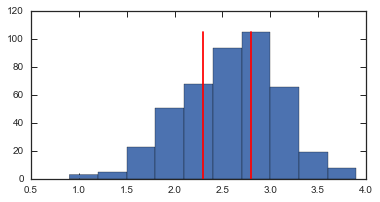

Accuracy: 0.3955 +-0.0435 | Baseline: 0.3665 | Relative accuracy: 0.0290 

## ----------------- ##
## CONSCIENTIOUSNESS ##
## ----------------- ##
Model parameters: {
    "bootstrap": false, 
    "min_samples_leaf": 6, 
    "n_estimators": 39, 
    "min_samples_split": 9, 
    "criterion": "entropy", 
    "max_features": 2, 
    "max_depth": 5
}


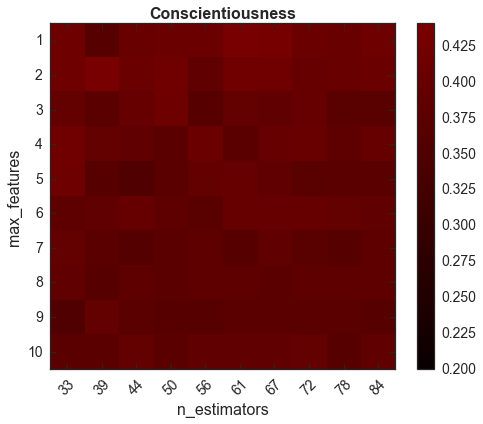

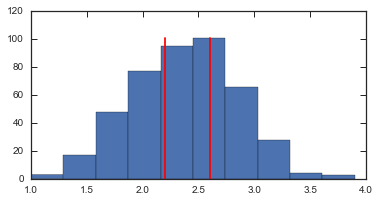

Accuracy: 0.4409 +-0.0348 | Baseline: 0.3643 | Relative accuracy: 0.0767 

## ------------ ##
## EXTRAVERSION ##
## ------------ ##
Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 5, 
    "n_estimators": 59, 
    "min_samples_split": 6, 
    "criterion": "entropy", 
    "max_features": 1, 
    "max_depth": 4
}


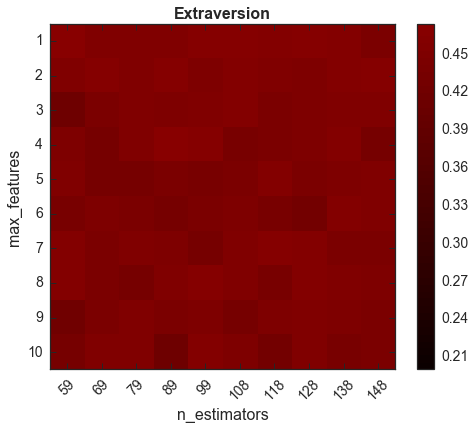

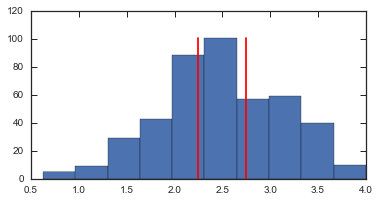

Accuracy: 0.4742 +-0.0435 | Baseline: 0.3756 | Relative accuracy: 0.0986 

## ------------- ##
## AGREEABLENESS ##
## ------------- ##
Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 9, 
    "n_estimators": 104, 
    "min_samples_split": 11, 
    "criterion": "entropy", 
    "max_features": 25, 
    "max_depth": 5
}


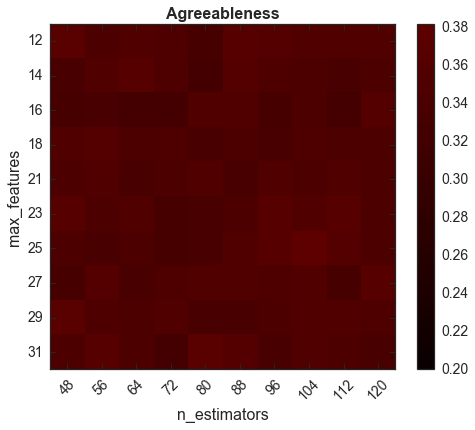

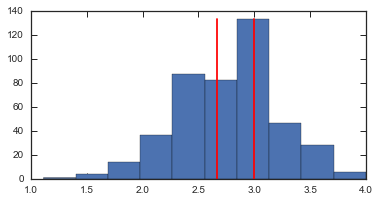

Accuracy: 0.3820 +-0.0432 | Baseline: 0.3891 | Relative accuracy: -0.0071 

## ----------- ##
## NEUROTICISM ##
## ----------- ##
Model parameters: {
    "bootstrap": true, 
    "min_samples_leaf": 6, 
    "n_estimators": 68, 
    "min_samples_split": 3, 
    "criterion": "gini", 
    "max_features": 25, 
    "max_depth": 5
}


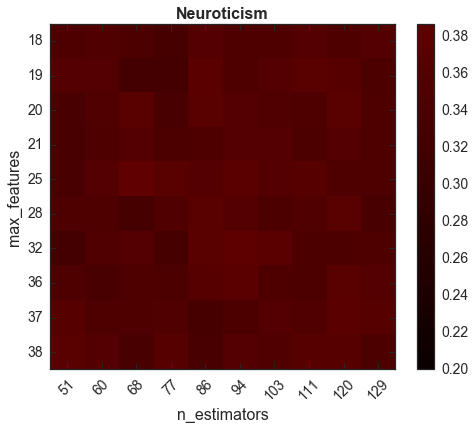

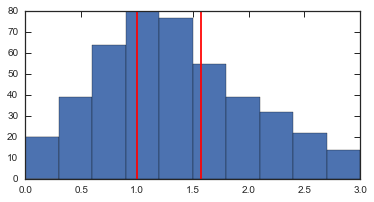

Accuracy: 0.3867 +-0.0333 | Baseline: 0.3665 | Relative accuracy: 0.0202 



In [585]:
print_classifier_scores(Xtz, Y, "tra", tune_params=True, folds=5, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

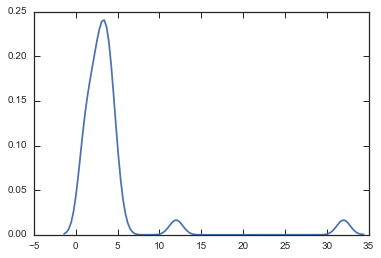

In [587]:
sns.kdeplot(np.array([3,4,1,2,4,1,2,3,1,3,3,2,3,4,12,3,4,1,2,3,4,1,2,3,4,4,5,5,4,32]))

## -------- ##
## OPENNESS ##
## -------- ##
Model parameters: {
    "n_jobs": -1, 
    "bootstrap": true, 
    "min_samples_leaf": 1, 
    "n_estimators": 25, 
    "min_samples_split": 6, 
    "criterion": "entropy", 
    "max_features": 26, 
    "max_depth": 3
}


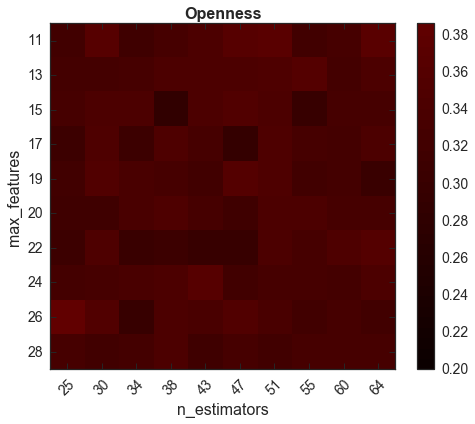

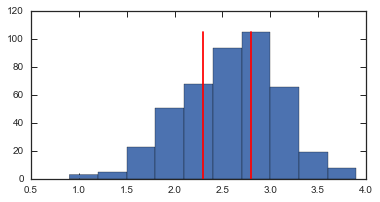

Positives:      [   14.80  33.00  41.20   ]
 True positives: [    2.80  13.00  16.40   ]
 Distribution:   [   19.00  36.00  34.00   ]

Accuracy: 0.3865 +-0.0298 | Baseline: 0.3665 | Relative accuracy: 0.0200 
[
    [
        "Conversation initiation rate depends on receiver", 
        "0.0362 +-0.0131"
    ], 
    [
        "Visits many places only once", 
        "0.0385 +-0.0225"
    ], 
    [
        "Returns calls and responds to texts", 
        "0.0451 +-0.0247"
    ], 
    [
        "Mostly goes in groups", 
        "0.0489 +-0.0326"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.1121 +-0.0453"
    ]
]

## ----------------- ##
## CONSCIENTIOUSNESS ##
## ----------------- ##
Model parameters: {
    "n_jobs": -1, 
    "bootstrap": true, 
    "min_samples_leaf": 6, 
    "n_estimators": 44, 
    "min_samples_split": 3, 
    "criterion": "gini", 
    "max_features": 10, 
    "max_depth": 4
}


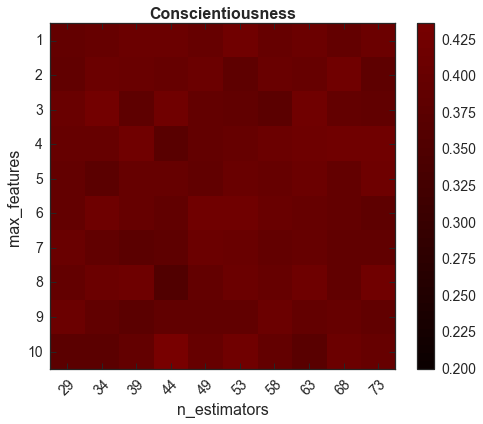

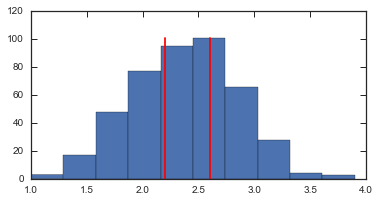

Positives:      [   34.00  14.60  40.40   ]
 True positives: [   11.40   6.00  15.60   ]
 Distribution:   [   27.00  30.00  32.00   ]

Accuracy: 0.4364 +-0.0326 | Baseline: 0.3643 | Relative accuracy: 0.0721 
[
    [
        "Avoids looking at phone when social", 
        "0.0406 +-0.0151"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0426 +-0.0087"
    ], 
    [
        "Mostly meets people at campus", 
        "0.0467 +-0.0121"
    ], 
    [
        "Makes long calls", 
        "0.0487 +-0.0085"
    ], 
    [
        "Uses phone at night", 
        "0.0581 +-0.0099"
    ]
]

## ------------ ##
## EXTRAVERSION ##
## ------------ ##
Model parameters: {
    "n_jobs": -1, 
    "bootstrap": true, 
    "min_samples_leaf": 8, 
    "n_estimators": 123, 
    "min_samples_split": 2, 
    "criterion": "entropy", 
    "max_features": 1, 
    "max_depth": 3
}


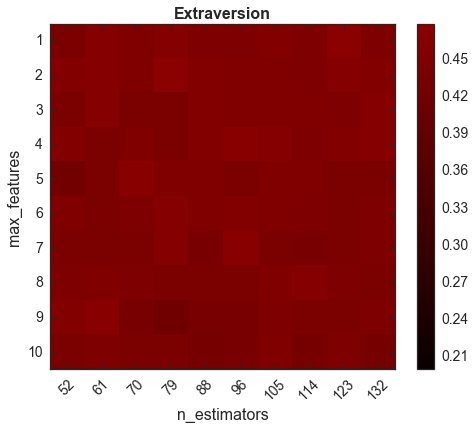

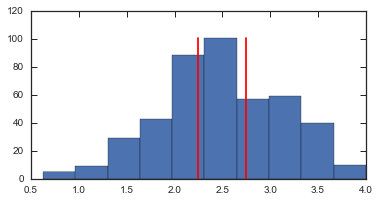

Positives:      [   26.20   1.20  61.60   ]
 True positives: [    9.20   0.40  20.80   ]
 Distribution:   [   33.00  26.00  30.00   ]

Accuracy: 0.4787 +-0.0242 | Baseline: 0.3756 | Relative accuracy: 0.1031 
[
    [
        "Meets with people in weekly patterns", 
        "0.0336 +-0.0039"
    ], 
    [
        "Interacts with strangers", 
        "0.0341 +-0.0053"
    ], 
    [
        "Goes many places at night", 
        "0.0342 +-0.0073"
    ], 
    [
        "Concludes text conversations", 
        "0.0364 +-0.0105"
    ], 
    [
        "Frequently calls and texts", 
        "0.0385 +-0.0080"
    ]
]

## ------------- ##
## AGREEABLENESS ##
## ------------- ##
Model parameters: {
    "n_jobs": -1, 
    "bootstrap": false, 
    "min_samples_leaf": 5, 
    "n_estimators": 79, 
    "min_samples_split": 10, 
    "criterion": "entropy", 
    "max_features": 10, 
    "max_depth": 4
}


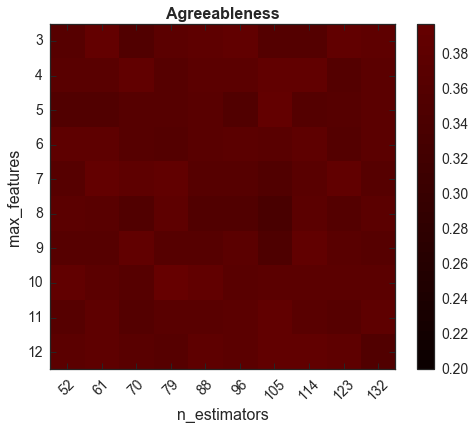

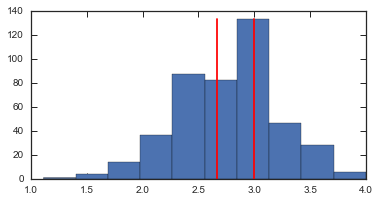

Positives:      [   21.40  15.80  51.80   ]
 True positives: [    6.60   7.40  21.80   ]
 Distribution:   [   26.00  28.00  35.00   ]

Accuracy: 0.3978 +-0.0352 | Baseline: 0.3891 | Relative accuracy: 0.0086 
[
    [
        "Interacts with strangers", 
        "0.0451 +-0.0304"
    ], 
    [
        "Responds quickly to missed calls", 
        "0.0489 +-0.0128"
    ], 
    [
        "Returns calls and responds to texts", 
        "0.0573 +-0.0188"
    ], 
    [
        "Frequently calls and texts", 
        "0.0664 +-0.0348"
    ], 
    [
        "Getting final word when texting depends on receiver", 
        "0.0984 +-0.0162"
    ]
]

## ----------- ##
## NEUROTICISM ##
## ----------- ##
Model parameters: {
    "n_jobs": -1, 
    "bootstrap": true, 
    "min_samples_leaf": 2, 
    "n_estimators": 18, 
    "min_samples_split": 7, 
    "criterion": "entropy", 
    "max_features": 30, 
    "max_depth": 4
}


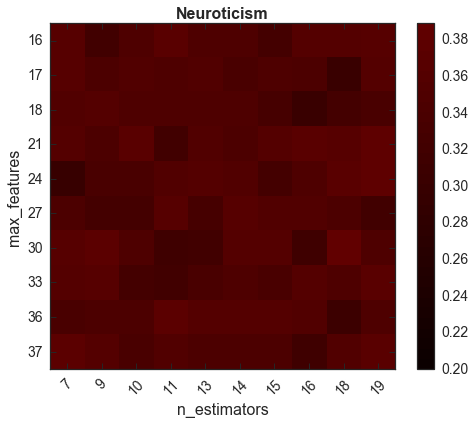

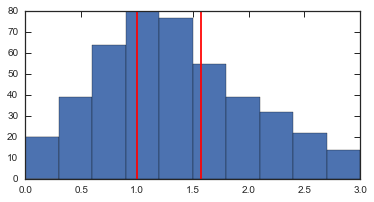

Positives:      [   15.80  36.80  36.40   ]
 True positives: [    4.00  15.80  12.60   ]
 Distribution:   [   24.00  35.00  30.00   ]

Accuracy: 0.3889 +-0.0773 | Baseline: 0.3665 | Relative accuracy: 0.0224 
[
    [
        "Visits many places only once", 
        "0.0357 +-0.0187"
    ], 
    [
        "Calls some people more than others", 
        "0.0386 +-0.0112"
    ], 
    [
        "Makes long calls", 
        "0.0487 +-0.0128"
    ], 
    [
        "Goes many places at night", 
        "0.0617 +-0.0216"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0826 +-0.0357"
    ]
]



In [579]:
print_classifier_scores(Xtz, Y, "tra", tune_params=True, folds=5, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

PC1 [  -0.604  0.343  -0.199  -0.152  0.346  ]

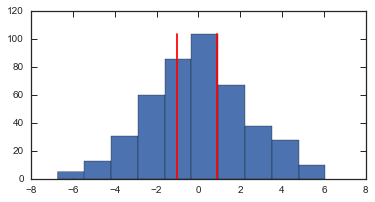

 Positives:      [   29.50  28.90  30.60   ]
 True positives: [   10.41   6.58  12.15   ]
 Distribution:   [   33.00  20.00  36.00   ]

Accuracy: 0.3322 +-0.0445 | Baseline: 0.3371 | Relative accuracy: -0.0049 
[
    [
        "Visits many places only once", 
        "0.0283 +-0.0035"
    ], 
    [
        "Mostly meets people at campus", 
        "0.0287 +-0.0037"
    ], 
    [
        "Frequently calls and texts", 
        "0.0298 +-0.0034"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0333 +-0.0031"
    ], 
    [
        "Goes many places at night", 
        "0.0372 +-0.0049"
    ]
]

PC2 [  -1.022  -0.517  -0.157  -0.475  -0.239  ]

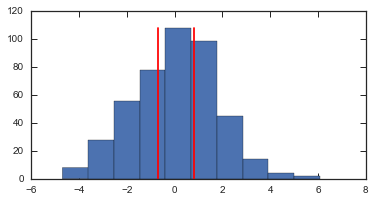

 Positives:      [   30.02  27.05  31.93   ]
 True positives: [    8.37  10.05  10.85   ]
 Distribution:   [   25.00  33.00  31.00   ]

Accuracy: 0.3770 +-0.0550 | Baseline: 0.3371 | Relative accuracy: 0.0399 
[
    [
        "Has many phone contacts", 
        "0.0295 +-0.0035"
    ], 
    [
        "Meets people at night", 
        "0.0306 +-0.0033"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0319 +-0.0041"
    ], 
    [
        "Visits many places only once", 
        "0.0326 +-0.0035"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0334 +-0.0038"
    ]
]

PC3 [  -1.282  0.077  -0.336  0.161  -0.150  ]

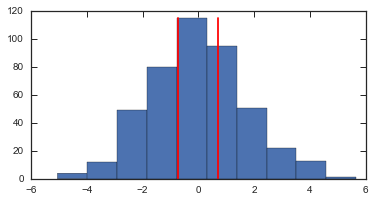

 Positives:      [   31.96  27.04  30.00   ]
 True positives: [   11.68   8.84   9.43   ]
 Distribution:   [   32.00  29.00  28.00   ]

Accuracy: 0.3545 +-0.0427 | Baseline: 0.3371 | Relative accuracy: 0.0174 
[
    [
        "Around people a lot", 
        "0.0285 +-0.0029"
    ], 
    [
        "Sends more texts than receives", 
        "0.0286 +-0.0026"
    ], 
    [
        "Meets people at night", 
        "0.0291 +-0.0033"
    ], 
    [
        "Response time to missed calls depends on receiver", 
        "0.0299 +-0.0031"
    ], 
    [
        "Makes long calls", 
        "0.0427 +-0.0047"
    ]
]

PC4 [  0.709  0.028  0.154  0.055  0.119  ]

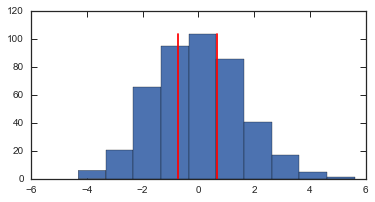

 Positives:      [   28.26  27.27  33.47   ]
 True positives: [   10.36   6.90  12.59   ]
 Distribution:   [   32.00  23.00  34.00   ]

Accuracy: 0.3896 +-0.0483 | Baseline: 0.3371 | Relative accuracy: 0.0524 
[
    [
        "Interacts with strangers", 
        "0.0293 +-0.0034"
    ], 
    [
        "Initiates most text conversations", 
        "0.0307 +-0.0036"
    ], 
    [
        "Around people a lot", 
        "0.0314 +-0.0034"
    ], 
    [
        "Sends more texts than receives", 
        "0.0342 +-0.0039"
    ], 
    [
        "Frequently calls and texts", 
        "0.0386 +-0.0041"
    ]
]

PC5 [  0.182  0.075  0.335  0.799  0.537  ]

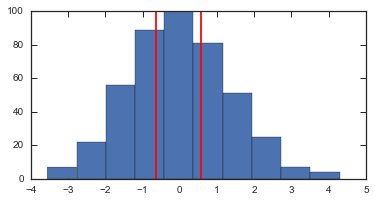

 Positives:      [   31.73  28.57  28.70   ]
 True positives: [   12.08   8.11   9.41   ]
 Distribution:   [   34.00  26.00  29.00   ]

Accuracy: 0.3804 +-0.0468 | Baseline: 0.3371 | Relative accuracy: 0.0433 
[
    [
        "Initiates most phone conversations", 
        "0.0304 +-0.0034"
    ], 
    [
        "Uses phone at night", 
        "0.0306 +-0.0033"
    ], 
    [
        "Initiates most text conversations", 
        "0.0316 +-0.0039"
    ], 
    [
        "Response time to missed calls depends on receiver", 
        "0.0330 +-0.0034"
    ], 
    [
        "Frequently calls and texts", 
        "0.0342 +-0.0037"
    ]
]

PC6 [  1.416  0.701  0.499  0.236  0.396  ]

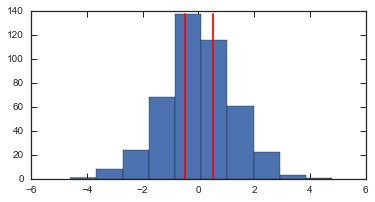

 Positives:      [   28.99  29.81  30.20   ]
 True positives: [   10.69  10.26   9.32   ]
 Distribution:   [   31.00  30.00  28.00   ]

Accuracy: 0.3345 +-0.0464 | Baseline: 0.3371 | Relative accuracy: -0.0026 
[
    [
        "Goes many places at night", 
        "0.0289 +-0.0032"
    ], 
    [
        "Makes long calls", 
        "0.0297 +-0.0033"
    ], 
    [
        "Responds quickly to missed calls", 
        "0.0299 +-0.0028"
    ], 
    [
        "Concludes text conversations", 
        "0.0306 +-0.0033"
    ], 
    [
        "Spends long time with people", 
        "0.0306 +-0.0032"
    ]
]



In [154]:
print_classifier_scores(Xtz, Q_pca, "pca", folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

OPENNESS | Uniform classifications: 0 / 100


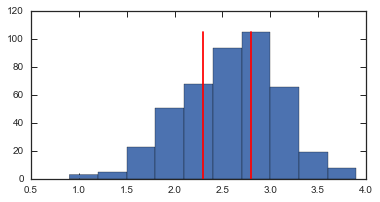

Positives:      [   15.16  35.07  38.77   ]
True positives: [    3.28  14.29  14.91   ]
Ground truth:   [   19.00  36.00  34.00   ]

Accuracy: 0.3372 +-0.0484 | Baseline: 0.3665 | Relative accuracy: -0.0293 
[
    [
        "Uses phone at night", 
        "0.0284 +-0.0029"
    ], 
    [
        "Conversation initiation rate depends on receiver", 
        "0.0285 +-0.0029"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0294 +-0.0029"
    ], 
    [
        "Sends more texts than receives", 
        "0.0295 +-0.0032"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0329 +-0.0036"
    ]
]

CONSCIENTIOUSNESS | Uniform classifications: 0 / 100


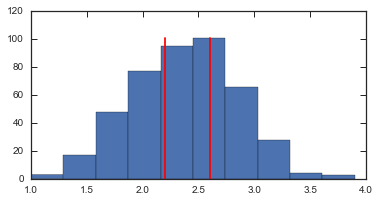

Positives:      [   30.27  20.33  38.40   ]
True positives: [    8.57   6.81  14.29   ]
Ground truth:   [   27.00  30.00  32.00   ]

Accuracy: 0.3848 +-0.0430 | Baseline: 0.3643 | Relative accuracy: 0.0206 
[
    [
        "Meets people at night", 
        "0.0302 +-0.0034"
    ], 
    [
        "Uses phone at night", 
        "0.0308 +-0.0032"
    ], 
    [
        "Makes long calls", 
        "0.0309 +-0.0040"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0315 +-0.0037"
    ], 
    [
        "Mostly meets people at campus", 
        "0.0324 +-0.0034"
    ]
]

EXTRAVERSION | Uniform classifications: 0 / 100


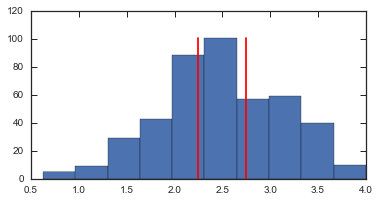

Positives:      [   31.39  14.59  43.02   ]
True positives: [   11.61   4.33  14.21   ]
Ground truth:   [   33.00  26.00  30.00   ]

Accuracy: 0.4188 +-0.0483 | Baseline: 0.3756 | Relative accuracy: 0.0432 
[
    [
        "Visits many places only once", 
        "0.0300 +-0.0033"
    ], 
    [
        "Has many phone contacts", 
        "0.0311 +-0.0036"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0312 +-0.0039"
    ], 
    [
        "Goes many places at night", 
        "0.0317 +-0.0037"
    ], 
    [
        "Frequently calls and texts", 
        "0.0474 +-0.0054"
    ]
]

AGREEABLENESS | Uniform classifications: 0 / 100


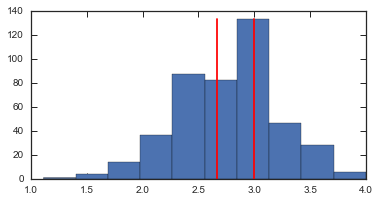

Positives:      [   25.16  15.23  48.61   ]
True positives: [    7.39   5.02  18.89   ]
Ground truth:   [   26.00  28.00  35.00   ]

Accuracy: 0.3297 +-0.0459 | Baseline: 0.3891 | Relative accuracy: -0.0595 
[
    [
        "Responds quickly to missed calls", 
        "0.0293 +-0.0032"
    ], 
    [
        "Meets people at night", 
        "0.0296 +-0.0033"
    ], 
    [
        "Returns calls and responds to texts", 
        "0.0298 +-0.0032"
    ], 
    [
        "Keeps phone sessions short", 
        "0.0301 +-0.0034"
    ], 
    [
        "Getting final word when texting depends on receiver", 
        "0.0327 +-0.0035"
    ]
]

NEUROTICISM | Uniform classifications: 0 / 100


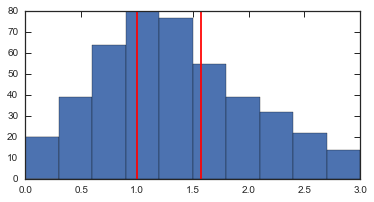

Positives:      [   13.70  36.83  38.47   ]
True positives: [    3.56  13.87  12.56   ]
Ground truth:   [   24.00  35.00  30.00   ]

Accuracy: 0.3431 +-0.0507 | Baseline: 0.3665 | Relative accuracy: -0.0234 
[
    [
        "Response time to texts depends on receiver", 
        "0.0298 +-0.0029"
    ], 
    [
        "Calls some people more than others", 
        "0.0309 +-0.0035"
    ], 
    [
        "Makes long calls", 
        "0.0323 +-0.0032"
    ], 
    [
        "Goes many places at night", 
        "0.0323 +-0.0041"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0336 +-0.0036"
    ]
]



In [34]:
# Big Five traits
print_classifier_scores(Xtz, Y, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

ACHIEVER | Uniform classifications: 0 / 100


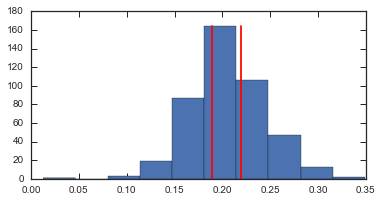

Positives:      [   31.39  28.70  28.91   ]
True positives: [   10.71  10.16   8.60   ]
Ground truth:   [   31.00  32.00  26.00   ]

Accuracy: 0.3251 +-0.0408 | Baseline: 0.3371 | Relative accuracy: -0.0120 
[
    [
        "Frequently calls and texts", 
        "0.0291 +-0.0029"
    ], 
    [
        "Uses phone at night", 
        "0.0296 +-0.0034"
    ], 
    [
        "Meets people at night", 
        "0.0297 +-0.0028"
    ], 
    [
        "Interacts with strangers", 
        "0.0298 +-0.0031"
    ], 
    [
        "Initiates most text conversations", 
        "0.0315 +-0.0036"
    ]
]

HOST | Uniform classifications: 1 / 100


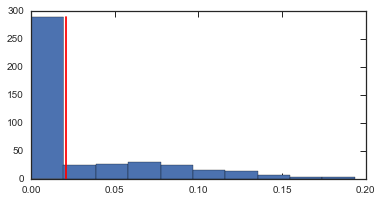

Positives:      [    0.00  83.15   5.85   ]
True positives: [    0.00  53.37   2.22   ]
Ground truth:   [    0.00  57.00  32.00   ]

Accuracy: 0.6508 +-0.0490 | Baseline: 0.6629 | Relative accuracy: -0.0121 
[
    [
        "Makes long calls", 
        "0.0310 +-0.0040"
    ], 
    [
        "Goes many places at night", 
        "0.0311 +-0.0042"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0322 +-0.0051"
    ], 
    [
        "Initiates most text conversations", 
        "0.0365 +-0.0054"
    ], 
    [
        "Spends long time with people", 
        "0.0396 +-0.0065"
    ]
]

WILDCARD | Uniform classifications: 0 / 100


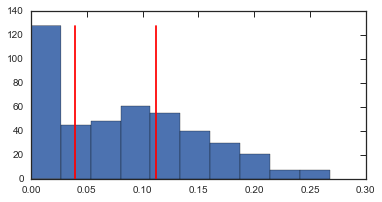

Positives:      [   28.83  29.82  30.35   ]
True positives: [    9.25   8.88  10.80   ]
Ground truth:   [   29.00  27.00  33.00   ]

Accuracy: 0.3489 +-0.0497 | Baseline: 0.3371 | Relative accuracy: 0.0118 
[
    [
        "Interacts with strangers", 
        "0.0284 +-0.0032"
    ], 
    [
        "Around people a lot", 
        "0.0296 +-0.0027"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0299 +-0.0035"
    ], 
    [
        "Goes many places at night", 
        "0.0317 +-0.0036"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0377 +-0.0046"
    ]
]

LOYALIST | Uniform classifications: 0 / 100


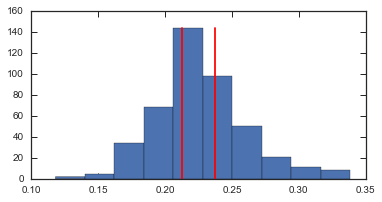

Positives:      [   30.23  28.44  30.33   ]
True positives: [    9.60  11.05   9.38   ]
Ground truth:   [   28.00  34.00  27.00   ]

Accuracy: 0.3634 +-0.0471 | Baseline: 0.3371 | Relative accuracy: 0.0263 
[
    [
        "Spends long time with people", 
        "0.0294 +-0.0029"
    ], 
    [
        "Sends more texts than receives", 
        "0.0296 +-0.0033"
    ], 
    [
        "Uses phone at night", 
        "0.0296 +-0.0033"
    ], 
    [
        "Has long ongoing text conversations", 
        "0.0312 +-0.0027"
    ], 
    [
        "Conversation initiation rate depends on receiver", 
        "0.0332 +-0.0043"
    ]
]

HIPPIE | Uniform classifications: 0 / 100


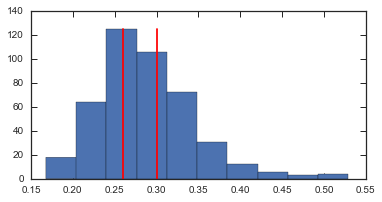

Positives:      [   31.34  27.13  30.53   ]
True positives: [   10.17   9.18   8.77   ]
Ground truth:   [   31.00  31.00  27.00   ]

Accuracy: 0.3966 +-0.0495 | Baseline: 0.3371 | Relative accuracy: 0.0595 
[
    [
        "Visits many places only once", 
        "0.0299 +-0.0036"
    ], 
    [
        "Has many phone contacts", 
        "0.0300 +-0.0034"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0332 +-0.0040"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0376 +-0.0045"
    ], 
    [
        "Frequently calls and texts", 
        "0.0432 +-0.0048"
    ]
]

FOLLOWER | Uniform classifications: 0 / 100


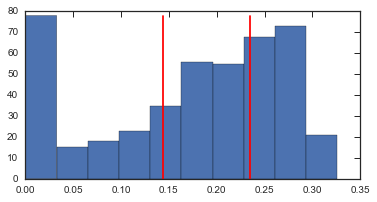

Positives:      [   33.92  25.44  29.64   ]
True positives: [   10.18   8.79  10.87   ]
Ground truth:   [   27.00  29.00  33.00   ]

Accuracy: 0.3885 +-0.0437 | Baseline: 0.3371 | Relative accuracy: 0.0514 
[
    [
        "Goes many places at night", 
        "0.0306 +-0.0038"
    ], 
    [
        "Response time to missed calls depends on receiver", 
        "0.0309 +-0.0031"
    ], 
    [
        "Meets people at night", 
        "0.0311 +-0.0037"
    ], 
    [
        "Concludes text conversations", 
        "0.0321 +-0.0041"
    ], 
    [
        "Frequently calls and texts", 
        "0.0444 +-0.0057"
    ]
]



In [35]:
# Thetas
print_classifier_scores(Xtz, M, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

ACHIEVER | Uniform classifications: 0 / 100


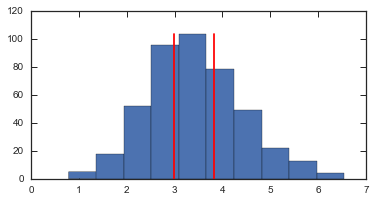

Positives:      [   28.94  28.21  31.85   ]
True positives: [    7.53  11.18  10.35   ]
Ground truth:   [   24.00  35.00  30.00   ]

Accuracy: 0.3840 +-0.0421 | Baseline: 0.3371 | Relative accuracy: 0.0469 
[
    [
        "Interacts with strangers", 
        "0.0304 +-0.0035"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0315 +-0.0035"
    ], 
    [
        "Makes long calls", 
        "0.0321 +-0.0032"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0322 +-0.0039"
    ], 
    [
        "Frequently calls and texts", 
        "0.0338 +-0.0037"
    ]
]

HOST | Uniform classifications: 0 / 100


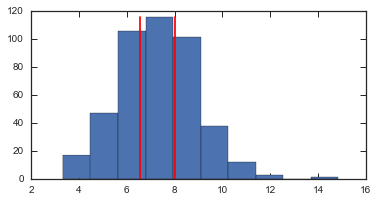

Positives:      [   29.85  27.13  32.02   ]
True positives: [    8.73  10.89   9.71   ]
Ground truth:   [   27.00  35.00  27.00   ]

Accuracy: 0.3717 +-0.0494 | Baseline: 0.3371 | Relative accuracy: 0.0346 
[
    [
        "Spends time at campus", 
        "0.0301 +-0.0030"
    ], 
    [
        "Calls some people more than others", 
        "0.0305 +-0.0032"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0308 +-0.0039"
    ], 
    [
        "Initiates most text conversations", 
        "0.0316 +-0.0035"
    ], 
    [
        "Frequently calls and texts", 
        "0.0365 +-0.0044"
    ]
]

WILDCARD | Uniform classifications: 0 / 100


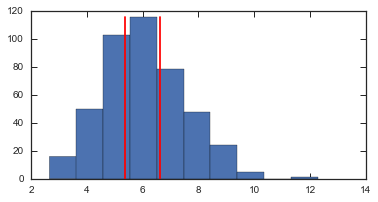

Positives:      [   31.05  27.70  30.25   ]
True positives: [   10.58   8.09  11.74   ]
Ground truth:   [   30.00  24.00  35.00   ]

Accuracy: 0.3285 +-0.0470 | Baseline: 0.3371 | Relative accuracy: -0.0086 
[
    [
        "Goes many places at night", 
        "0.0307 +-0.0036"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0312 +-0.0041"
    ], 
    [
        "Around people a lot", 
        "0.0320 +-0.0040"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0326 +-0.0038"
    ], 
    [
        "Frequently calls and texts", 
        "0.0326 +-0.0037"
    ]
]

LOYALIST | Uniform classifications: 0 / 100


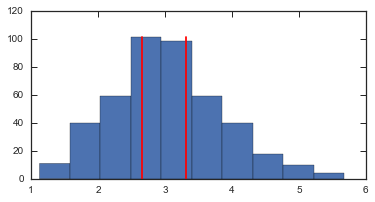

Positives:      [   31.19  26.44  31.37   ]
True positives: [   10.84   8.25  10.26   ]
Ground truth:   [   31.00  28.00  30.00   ]

Accuracy: 0.3926 +-0.0501 | Baseline: 0.3371 | Relative accuracy: 0.0555 
[
    [
        "Makes long calls", 
        "0.0307 +-0.0030"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0320 +-0.0039"
    ], 
    [
        "Getting final word when texting depends on receiver", 
        "0.0333 +-0.0040"
    ], 
    [
        "Goes many places at night", 
        "0.0338 +-0.0044"
    ], 
    [
        "Uses phone at night", 
        "0.0360 +-0.0044"
    ]
]

HIPPIE | Uniform classifications: 0 / 100


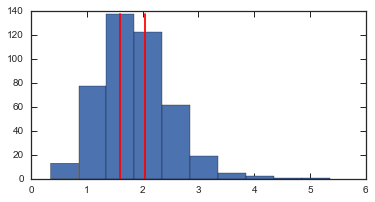

Positives:      [   29.80  27.40  31.80   ]
True positives: [   10.47   7.57  11.75   ]
Ground truth:   [   30.00  25.00  34.00   ]

Accuracy: 0.3743 +-0.0503 | Baseline: 0.3371 | Relative accuracy: 0.0372 
[
    [
        "Distributes time at different locations evenly", 
        "0.0297 +-0.0030"
    ], 
    [
        "Meets people at night", 
        "0.0309 +-0.0035"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0356 +-0.0034"
    ], 
    [
        "Visits many places only once", 
        "0.0386 +-0.0044"
    ], 
    [
        "Frequently calls and texts", 
        "0.0394 +-0.0046"
    ]
]

FOLLOWER | Uniform classifications: 0 / 100


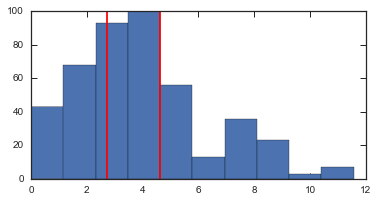

Positives:      [   31.53  14.53  42.94   ]
True positives: [   11.75   4.15  14.64   ]
Ground truth:   [   33.00  26.00  30.00   ]

Accuracy: 0.4222 +-0.0432 | Baseline: 0.3756 | Relative accuracy: 0.0467 
[
    [
        "Visits many places only once", 
        "0.0306 +-0.0039"
    ], 
    [
        "Has many phone contacts", 
        "0.0311 +-0.0034"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0313 +-0.0033"
    ], 
    [
        "Goes many places at night", 
        "0.0318 +-0.0038"
    ], 
    [
        "Frequently calls and texts", 
        "0.0466 +-0.0049"
    ]
]



In [36]:
# D concensus
print_classifier_scores(Xtz, D, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

ACHIEVER | Uniform classifications: 0 / 100


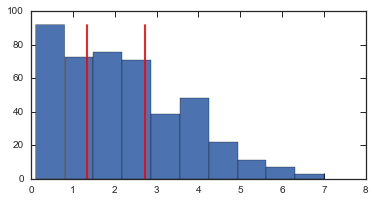

Positives:      [   30.89  28.95  29.16   ]
True positives: [    9.40   9.38  10.18   ]
Ground truth:   [   28.00  29.00  32.00   ]

Accuracy: 0.3397 +-0.0493 | Baseline: 0.3371 | Relative accuracy: 0.0026 
[
    [
        "Responds quickly to texts", 
        "0.0292 +-0.0036"
    ], 
    [
        "Spends time at campus", 
        "0.0295 +-0.0030"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0318 +-0.0033"
    ], 
    [
        "Goes many places at night", 
        "0.0331 +-0.0036"
    ], 
    [
        "Makes long calls", 
        "0.0348 +-0.0035"
    ]
]

HOST | Uniform classifications: 0 / 100


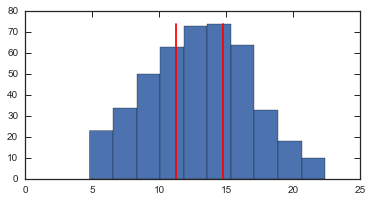

Positives:      [   30.30  27.81  30.89   ]
True positives: [    8.22  12.25   8.76   ]
Ground truth:   [   25.00  39.00  25.00   ]

Accuracy: 0.3455 +-0.0445 | Baseline: 0.3371 | Relative accuracy: 0.0084 
[
    [
        "Calls some people more than others", 
        "0.0307 +-0.0032"
    ], 
    [
        "Goes many places at night", 
        "0.0308 +-0.0036"
    ], 
    [
        "Initiates most text conversations", 
        "0.0314 +-0.0037"
    ], 
    [
        "Makes long calls", 
        "0.0318 +-0.0038"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0327 +-0.0035"
    ]
]

WILDCARD | Uniform classifications: 0 / 100


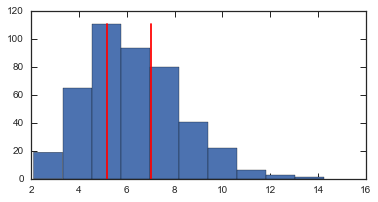

Positives:      [   30.44  27.28  31.28   ]
True positives: [    9.16   7.98  12.64   ]
Ground truth:   [   27.00  26.00  36.00   ]

Accuracy: 0.3724 +-0.0540 | Baseline: 0.3371 | Relative accuracy: 0.0353 
[
    [
        "Around people a lot", 
        "0.0294 +-0.0031"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0295 +-0.0032"
    ], 
    [
        "Selective text and call response rate", 
        "0.0330 +-0.0038"
    ], 
    [
        "Goes many places at night", 
        "0.0340 +-0.0044"
    ], 
    [
        "Frequently calls and texts", 
        "0.0428 +-0.0049"
    ]
]

LOYALIST | Uniform classifications: 0 / 100


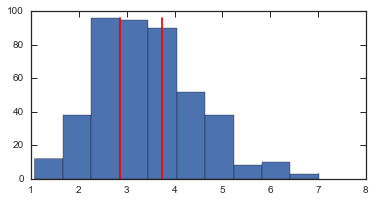

Positives:      [   32.13  27.86  29.01   ]
True positives: [   10.67   9.02   9.67   ]
Ground truth:   [   29.00  29.00  31.00   ]

Accuracy: 0.3542 +-0.0407 | Baseline: 0.3371 | Relative accuracy: 0.0171 
[
    [
        "Conversation initiation rate depends on receiver", 
        "0.0296 +-0.0033"
    ], 
    [
        "Mostly goes in groups", 
        "0.0309 +-0.0035"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0311 +-0.0037"
    ], 
    [
        "Meets people at night", 
        "0.0312 +-0.0031"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0318 +-0.0038"
    ]
]

HIPPIE | Uniform classifications: 0 / 100


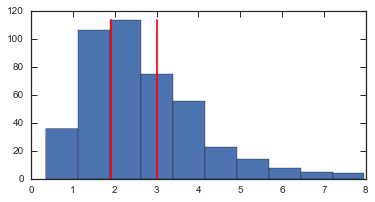

Positives:      [   31.12  26.13  31.75   ]
True positives: [    9.63   8.40  11.07   ]
Ground truth:   [   29.00  28.00  32.00   ]

Accuracy: 0.4066 +-0.0516 | Baseline: 0.3371 | Relative accuracy: 0.0695 
[
    [
        "Has many phone contacts", 
        "0.0306 +-0.0036"
    ], 
    [
        "Meets people at night", 
        "0.0321 +-0.0040"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0331 +-0.0042"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0333 +-0.0038"
    ], 
    [
        "Frequently calls and texts", 
        "0.0411 +-0.0046"
    ]
]

FOLLOWER | Uniform classifications: 0 / 100


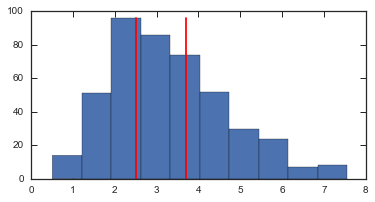

Positives:      [   31.20  28.01  29.79   ]
True positives: [   10.75  10.22   8.78   ]
Ground truth:   [   31.00  32.00  26.00   ]

Accuracy: 0.3834 +-0.0421 | Baseline: 0.3371 | Relative accuracy: 0.0463 
[
    [
        "Mostly meets people at campus", 
        "0.0289 +-0.0034"
    ], 
    [
        "Selective text and call response rate", 
        "0.0294 +-0.0032"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0330 +-0.0038"
    ], 
    [
        "Goes many places at night", 
        "0.0370 +-0.0042"
    ], 
    [
        "Frequently calls and texts", 
        "0.0381 +-0.0042"
    ]
]



In [38]:
# D var
print_classifier_scores(Xtz, D_var, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

ACHIEVER | Uniform classifications: 0 / 100


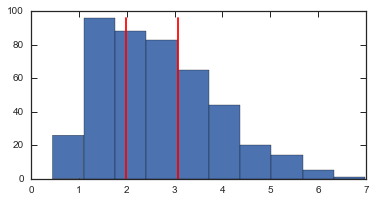

Positives:      [   29.99  28.43  30.58   ]
True positives: [    9.52   9.35  10.19   ]
Ground truth:   [   30.00  29.00  30.00   ]

Accuracy: 0.3591 +-0.0443 | Baseline: 0.3371 | Relative accuracy: 0.0220 
[
    [
        "Meets with people in weekly patterns", 
        "0.0301 +-0.0034"
    ], 
    [
        "Interacts with strangers", 
        "0.0304 +-0.0032"
    ], 
    [
        "Makes long calls", 
        "0.0309 +-0.0037"
    ], 
    [
        "Goes many places at night", 
        "0.0324 +-0.0040"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0354 +-0.0035"
    ]
]

HOST | Uniform classifications: 0 / 100


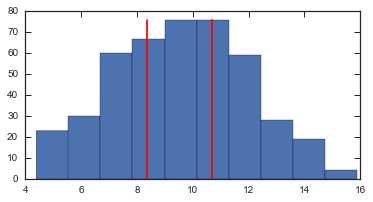

Positives:      [   31.44  26.63  30.93   ]
True positives: [    9.25  11.43   9.03   ]
Ground truth:   [   26.00  38.00  25.00   ]

Accuracy: 0.3534 +-0.0418 | Baseline: 0.3371 | Relative accuracy: 0.0163 
[
    [
        "Goes many places at night", 
        "0.0290 +-0.0036"
    ], 
    [
        "Spends time at campus", 
        "0.0315 +-0.0038"
    ], 
    [
        "Initiates most text conversations", 
        "0.0318 +-0.0030"
    ], 
    [
        "Initiates most phone conversations", 
        "0.0336 +-0.0040"
    ], 
    [
        "Makes long calls", 
        "0.0362 +-0.0043"
    ]
]

WILDCARD | Uniform classifications: 0 / 100


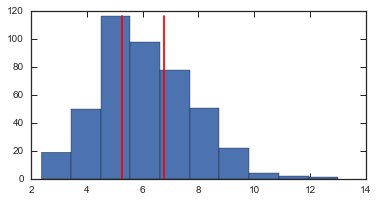

Positives:      [   31.68  27.88  29.44   ]
True positives: [   11.25   7.74  11.56   ]
Ground truth:   [   32.00  23.00  34.00   ]

Accuracy: 0.3596 +-0.0492 | Baseline: 0.3371 | Relative accuracy: 0.0224 
[
    [
        "Avoids looking at phone when social", 
        "0.0300 +-0.0040"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0305 +-0.0035"
    ], 
    [
        "Selective text and call response rate", 
        "0.0308 +-0.0040"
    ], 
    [
        "Goes many places at night", 
        "0.0356 +-0.0040"
    ], 
    [
        "Frequently calls and texts", 
        "0.0360 +-0.0040"
    ]
]

LOYALIST | Uniform classifications: 0 / 100


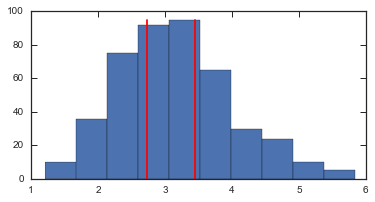

Positives:      [   32.67  26.29  30.04   ]
True positives: [   10.92   8.47  10.81   ]
Ground truth:   [   29.00  28.00  32.00   ]

Accuracy: 0.3647 +-0.0469 | Baseline: 0.3371 | Relative accuracy: 0.0276 
[
    [
        "Sends more texts than receives", 
        "0.0294 +-0.0034"
    ], 
    [
        "Returns calls and responds to texts", 
        "0.0297 +-0.0032"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0300 +-0.0029"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0336 +-0.0038"
    ], 
    [
        "Uses phone at night", 
        "0.0343 +-0.0042"
    ]
]

HIPPIE | Uniform classifications: 0 / 100


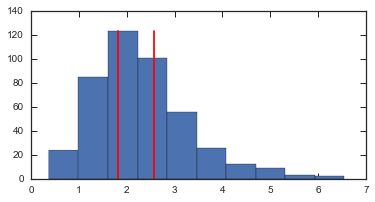

Positives:      [   33.52  24.58  30.90   ]
True positives: [   10.84   6.29  12.11   ]
Ground truth:   [   29.00  24.00  36.00   ]

Accuracy: 0.3925 +-0.0515 | Baseline: 0.3371 | Relative accuracy: 0.0554 
[
    [
        "Visits many places only once", 
        "0.0314 +-0.0038"
    ], 
    [
        "Meets people at night", 
        "0.0317 +-0.0035"
    ], 
    [
        "Has many phone contacts", 
        "0.0324 +-0.0039"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0362 +-0.0046"
    ], 
    [
        "Frequently calls and texts", 
        "0.0409 +-0.0050"
    ]
]

FOLLOWER | Uniform classifications: 0 / 100


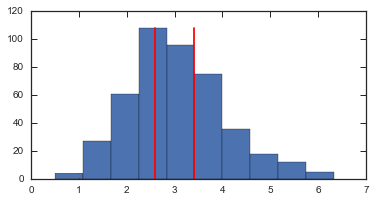

Positives:      [   31.77  27.93  29.30   ]
True positives: [   10.50   9.98   9.02   ]
Ground truth:   [   30.00  32.00  27.00   ]

Accuracy: 0.3666 +-0.0464 | Baseline: 0.3371 | Relative accuracy: 0.0295 
[
    [
        "Makes long calls", 
        "0.0295 +-0.0029"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0300 +-0.0035"
    ], 
    [
        "Visits many places only once", 
        "0.0304 +-0.0033"
    ], 
    [
        "Distributes time at different locations evenly", 
        "0.0322 +-0.0034"
    ], 
    [
        "Goes many places at night", 
        "0.0393 +-0.0045"
    ]
]



In [39]:
# D std
print_classifier_scores(Xtz, D_std, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

ACHIEVER | Uniform classifications: 0 / 100


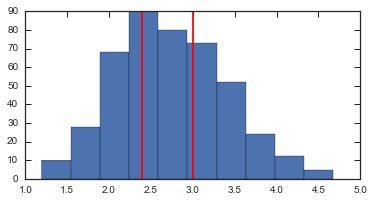

Positives:      [   28.98  28.78  31.24   ]
True positives: [    9.27   9.36  10.62   ]
Ground truth:   [   30.00  29.00  30.00   ]

Accuracy: 0.3463 +-0.0438 | Baseline: 0.3371 | Relative accuracy: 0.0092 
[
    [
        "Has long ongoing text conversations", 
        "0.0293 +-0.0033"
    ], 
    [
        "Selective text and call response rate", 
        "0.0295 +-0.0032"
    ], 
    [
        "Makes long calls", 
        "0.0301 +-0.0035"
    ], 
    [
        "Prefers calling over texting", 
        "0.0306 +-0.0030"
    ], 
    [
        "Frequently calls and texts", 
        "0.0329 +-0.0035"
    ]
]

HOST | Uniform classifications: 0 / 100


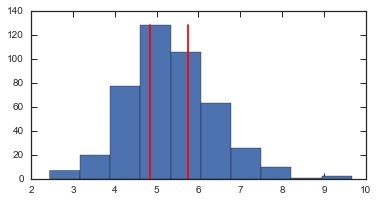

Positives:      [   30.72  27.56  30.72   ]
True positives: [    9.35  10.81  10.11   ]
Ground truth:   [   27.00  33.00  29.00   ]

Accuracy: 0.3607 +-0.0452 | Baseline: 0.3371 | Relative accuracy: 0.0236 
[
    [
        "Makes long calls", 
        "0.0302 +-0.0032"
    ], 
    [
        "Spends time at campus", 
        "0.0304 +-0.0034"
    ], 
    [
        "Initiates most text conversations", 
        "0.0306 +-0.0040"
    ], 
    [
        "Interacts with strangers", 
        "0.0306 +-0.0031"
    ], 
    [
        "Frequently calls and texts", 
        "0.0341 +-0.0040"
    ]
]

WILDCARD | Uniform classifications: 0 / 100


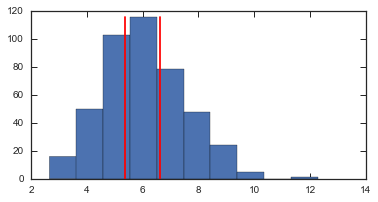

Positives:      [   31.01  27.79  30.20   ]
True positives: [   10.64   8.18  12.04   ]
Ground truth:   [   30.00  24.00  35.00   ]

Accuracy: 0.3304 +-0.0495 | Baseline: 0.3371 | Relative accuracy: -0.0067 
[
    [
        "Meets with people in weekly patterns", 
        "0.0301 +-0.0036"
    ], 
    [
        "Goes many places at night", 
        "0.0312 +-0.0037"
    ], 
    [
        "Around people a lot", 
        "0.0314 +-0.0033"
    ], 
    [
        "Avoids looking at phone when social", 
        "0.0319 +-0.0032"
    ], 
    [
        "Frequently calls and texts", 
        "0.0334 +-0.0032"
    ]
]

LOYALIST | Uniform classifications: 0 / 100


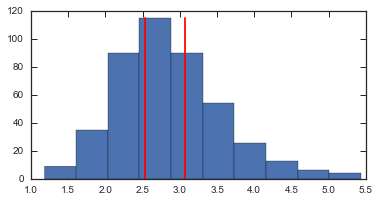

Positives:      [   32.63  27.38  28.99   ]
True positives: [   11.38   9.58   8.25   ]
Ground truth:   [   31.00  31.00  27.00   ]

Accuracy: 0.3780 +-0.0475 | Baseline: 0.3371 | Relative accuracy: 0.0409 
[
    [
        "Has long ongoing text conversations", 
        "0.0294 +-0.0039"
    ], 
    [
        "Spends short time at locations", 
        "0.0310 +-0.0036"
    ], 
    [
        "Frequently calls and texts", 
        "0.0311 +-0.0038"
    ], 
    [
        "Around people a lot", 
        "0.0318 +-0.0039"
    ], 
    [
        "Uses phone at night", 
        "0.0342 +-0.0044"
    ]
]

HIPPIE | Uniform classifications: 0 / 100


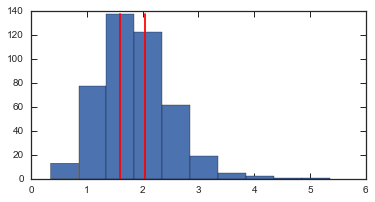

Positives:      [   30.13  26.53  32.34   ]
True positives: [   10.14   7.09  12.21   ]
Ground truth:   [   30.00  25.00  34.00   ]

Accuracy: 0.3718 +-0.0456 | Baseline: 0.3371 | Relative accuracy: 0.0347 
[
    [
        "Has many phone contacts", 
        "0.0296 +-0.0036"
    ], 
    [
        "Meets people at night", 
        "0.0304 +-0.0038"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0360 +-0.0038"
    ], 
    [
        "Visits many places only once", 
        "0.0387 +-0.0041"
    ], 
    [
        "Frequently calls and texts", 
        "0.0393 +-0.0042"
    ]
]

FOLLOWER | Uniform classifications: 0 / 100


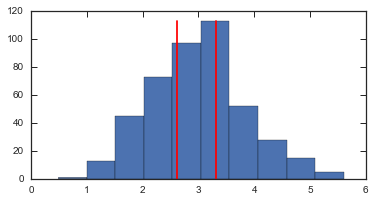

Positives:      [   31.16  30.07  27.77   ]
True positives: [   10.92  10.70   8.62   ]
Ground truth:   [   31.00  30.00  28.00   ]

Accuracy: 0.3311 +-0.0467 | Baseline: 0.3371 | Relative accuracy: -0.0060 
[
    [
        "Visits many places only once", 
        "0.0291 +-0.0033"
    ], 
    [
        "Meets with people in weekly patterns", 
        "0.0305 +-0.0032"
    ], 
    [
        "Makes long calls", 
        "0.0326 +-0.0032"
    ], 
    [
        "Mostly meets people at campus", 
        "0.0340 +-0.0039"
    ], 
    [
        "Goes many places at night", 
        "0.0350 +-0.0041"
    ]
]



In [40]:
# D None
print_classifier_scores(Xtz, D_None, folds=100, stratified=False, num_classes=3, balanced_classes=True, visualize=True)

# Parameter tuning

In [ ]:
def classifier_score(X, Y, folds, stratified, num_classes, rich_output=False, balance_classes=True):
    score = []
    
    feat_importance = []
    Y, thresholds = get_classes(Y, num_classes=num_classes, balanced=balance_classes, return_thresholds=True)

    class_score = np.empty((3, num_classes, folds))
    shitcounter = 0
    for fold in range(folds):
        train, test = cv_fold(Y, split_fraction=0.8, stratified=stratified)
        clf = RandomForestClassifier(n_estimators=100).fit(X[train, :], Y[train])
        Y_pred = clf.predict(X[test, :])
        fold_class_score = np.zeros((3, num_classes))
        for y_pred, y in zip(Y_pred, Y):
            if y_pred == y:
                fold_class_score[0, y] += 1
            fold_class_score[1, y_pred] += 1
            fold_class_score[2, y] += 1
        class_score[:, :, fold] = fold_class_score
        
        if np.sum([0 if y == Y_pred[0] else 1 for y in Y_pred]) == 0:
            shitcounter += 1
            
        score.append(np.sum(Y_pred == Y[test]) * 1.0 / len(Y[test]))
        feat_importance.append(clf.feature_importances_)
    
    print "| Uniform classifications:", shitcounter, "/", folds
    
    baseline = max(Counter(Y).values()) * 1.0 / sum(Counter(Y).values())
    
    if not rich_output:
        return np.mean(score)
    
    return np.mean(score), np.std(score), baseline, np.mean(class_score, axis=2), zip(np.mean(feat_importance, axis=0), np.std(feat_importance, axis=0)), thresholds

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

X = Xtz
y = get_classes(Y[:, 2], num_classes=3, balanced=True)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.01} with a score of 0.47


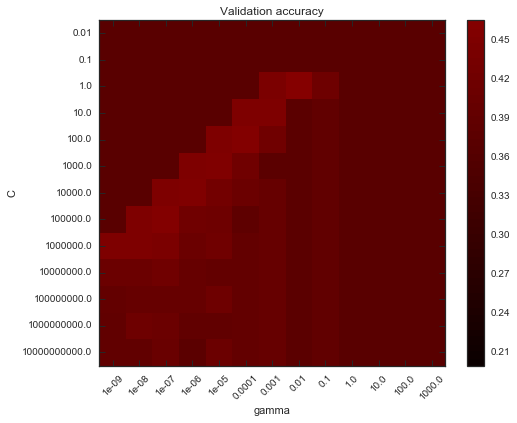

In [182]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [204]:
X = Xtz
y = get_classes(Y[:, 0], num_classes=3, balanced=True)

param_grid = {
    "n_estimators": [56, 58, 60, 62, 64],
    "min_samples_split": [2, 3, 10, 11, 12, 13],
    "max_depth": [3, 4],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True],
    "criterion": ["entropy"]
}
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
gridrf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv)
gridrf.fit(X, y)

print("The best parameters are %s with a score of %0.4f"
      % (gridrf.best_params_, gridrf.best_score_))

The best parameters are {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 13, 'max_depth': 3} with a score of 0.3888


In [540]:
gridrf.grid_scores_[0][2]

array([ 0.38202247,  0.38202247,  0.26966292,  0.41573034,  0.34831461])



#### Extraversion
The best parameters are {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 4} with a score of 0.4719
The best parameters are {'min_samples_split': 11, 'n_estimators': 56, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4719
The best parameters are {'min_samples_split': 10, 'n_estimators': 58, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4674
The best parameters are {'min_samples_split': 11, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.4719
The best parameters are {'min_samples_split': 12, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4} with a score of 0.4854
The best parameters are {'min_samples_split': 8, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3} with a score of 0.47
The best parameters are {'min_samples_split': 10, 'n_estimators': 55, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3} with a score of 0.48
The best parameters are {'min_samples_split': 10, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy'} with a score of 0.46
The best parameters are {'min_samples_split': 3, 'n_estimators': 60, 'bootstrap': True, 'criterion': 'entropy'} with a score of 0.46

In [ ]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [212]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

X = Xtz
y = get_classes(Y[:, 2], num_classes=3, balanced=True)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "min_samples_split": sp_randint(2, 13),
    "max_depth": sp_randint(3, 6),
    "min_samples_leaf": sp_randint(1, 10),
    "bootstrap": [True, False],
    "criterion": ["entropy", "gini"]
}

cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)

# run randomized search
n_iter_search = 500
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=cv)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 176.53 seconds for 500 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.472 (std: 0.012)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'n_estimators': 76, 'criterion': 'entropy', 'min_samples_split': 5, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.467 (std: 0.021)
Parameters: {'bootstrap': True, 'min_samples_leaf': 6, 'n_estimators': 67, 'criterion': 'gini', 'min_samples_split': 8, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.467 (std: 0.031)
Parameters: {'bootstrap': True, 'min_samples_leaf': 9, 'n_estimators': 60, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 5}



## Feature Selection

In [25]:
def backwards_forwards_feature_selection(X, Y, scoring_function, maxruns=100):
    N, M = X.shape
    removed_counter = Counter()
    recently_removed = [-1] * 2
    fs = np.empty((0, M))
    fs_score = []
    selected_against = set()
    loop_counter = 0
    percentage = 0
    while True:
        fs_iter = [np.nan] * M
        full_score = scoring_function(X[:, list(set(range(M)) - selected_against)], Y)

        start = dt.now()
        remove_candidate = (-1, -0.2)
        for i in set(range(M)) - selected_against:
            iter_score = scoring_function(X[:, list(set(range(M)) - selected_against - {i})], Y)
            i_score = iter_score - full_score
            fs_iter[range(M).index(i)] = i_score
            remove_candidate = (i, i_score) if i_score > remove_candidate[1] else remove_candidate
        #print "remove-loop", dt.now() - start

        recently_removed = recently_removed[1:] + [remove_candidate[0]]

        new_full_score = scoring_function(X[:, list(set(range(M)) - selected_against - {remove_candidate[0]})], Y)

        start = dt.now()
        add_candidate = (-1, 0)
        for i in selected_against - set(recently_removed):
            iter_score = scoring_function(X[:, list((set(range(M)) - selected_against) | {i})], Y)
            i_score = iter_score - new_full_score
            add_candidate = (i, i_score) if i_score > add_candidate[1] else add_candidate
        #print "add-loop", dt.now() - start

        if add_candidate[0] != -1 and removed_counter[add_candidate[0]] < 3:
            fs_iter[range(M).index(add_candidate[0])] = add_candidate[1]
            #selected_against.remove(add_candidate[0])
            #print remove_candidate, add_candidate

        if remove_candidate[0] != -1:
            fs = np.vstack([fs, np.array(fs_iter)])
            #selected_against.add(remove_candidate[0])
            removed_counter.update([remove_candidate[0]])

        if add_candidate[0] != -1 or remove_candidate[0] != -1:
            start = dt.now()
            score = scoring_function(X[:, list(set(range(M)) - selected_against)], Y)
            fs_score.append(score)
            #print "update-clause", dt.now() - start

        #print recently_removed

        else:
            break

        if len(set(range(M)) - selected_against) < 10:
            break
    
        if loop_counter == maxruns:
            break
        else:
            loop_counter += 1
            
        percentage = progress_percentage(loop_counter, percentage, maxruns)

    plt.figure(figsize=tuple(np.array(fs.shape[::-1]) * 17.0 / fs.shape[1]))
    #plt.title("target %d" % target, fontsize=40)
    sns.heatmap(-fs.T)
    plt.show()
    fig = plt.figure(figsize=(12.25,1))
    ax = fig.add_subplot(1, 1, 1)
    ax.yaxis.tick_right()
    plt.plot(range(len(fs_score)), fs_score)
    #plt.savefig(TMPFIGPATH+"feature_selection_%d_archetypes.pdf" % target)
    plt.show()
    
    return {
        'fs_max': fs[max(list(enumerate(fs_score)), key=lambda x: x[1])[0], :],
        'fs': fs,
        'fs_score': fs_score
        }

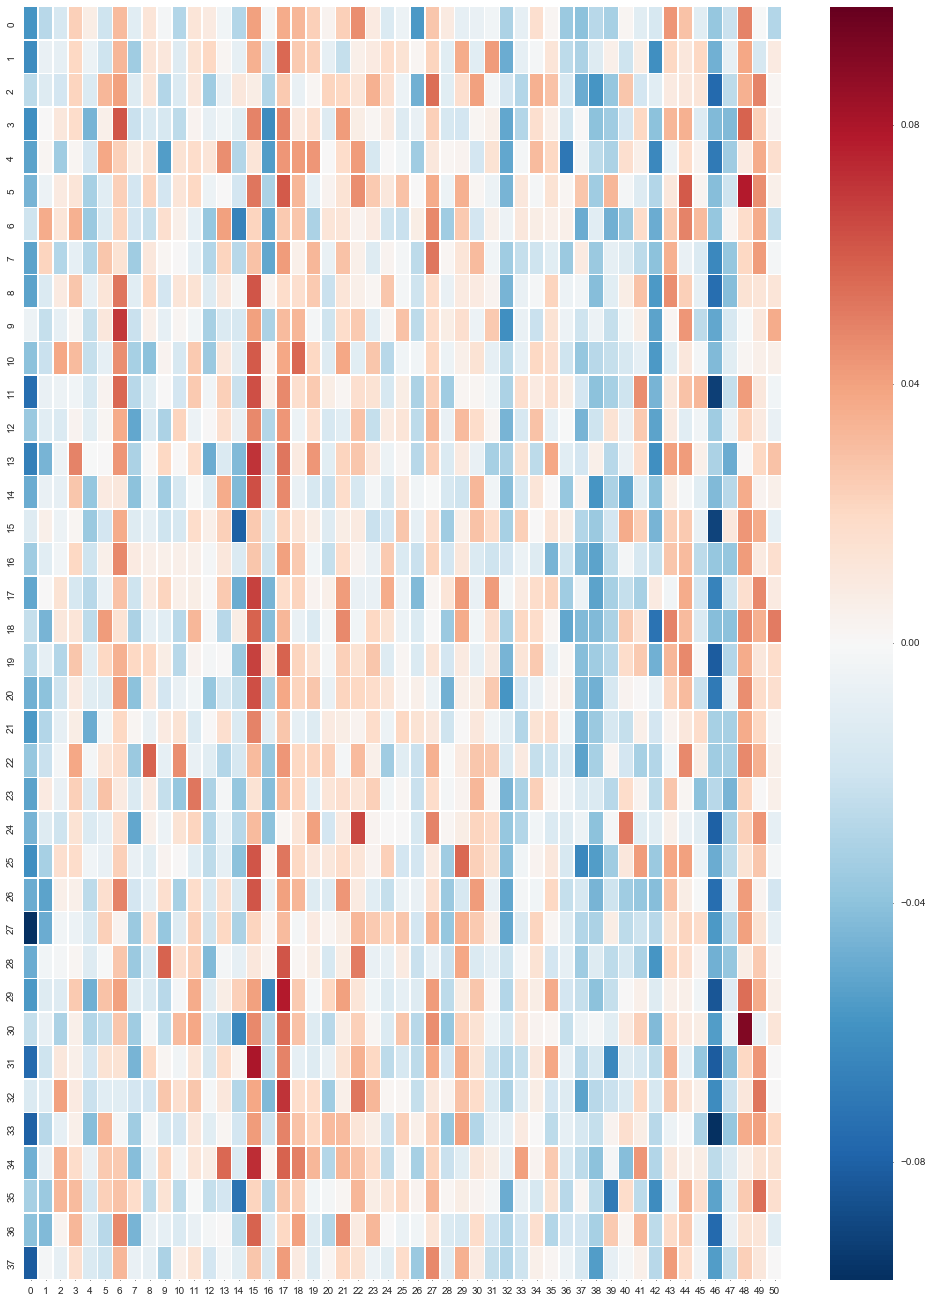

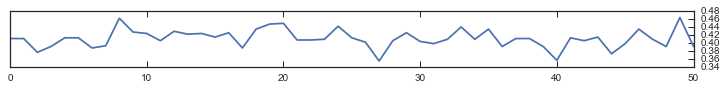

{'fs': array([[  5.81818182e-02,   6.18181818e-02,   2.54545455e-02, ...,
           3.27272727e-02,   4.00000000e-02,   8.18181818e-02],
        [  2.72727273e-02,   7.27272727e-03,   1.27272727e-02, ...,
           3.63636364e-02,   4.36363636e-02,   1.81818182e-03],
        [  1.63636364e-02,   9.09090909e-03,   1.81818182e-02, ...,
          -3.27272727e-02,  -3.63636364e-03,   9.09090909e-03],
        ..., 
        [ -4.90909091e-02,  -3.81818182e-02,  -3.45454545e-02, ...,
          -2.54545455e-02,  -1.45454545e-02,  -2.36363636e-02],
        [  1.11022302e-16,   1.63636364e-02,  -4.90909091e-02, ...,
          -5.45454545e-02,  -1.27272727e-02,  -1.09090909e-02],
        [  2.90909091e-02,  -9.09090909e-03,  -1.81818182e-03, ...,
          -1.63636364e-02,   1.09090909e-02,   0.00000000e+00]]),
 'fs_max': array([  1.11022302e-16,   1.63636364e-02,  -4.90909091e-02,
         -2.36363636e-02,  -3.63636364e-02,  -4.54545455e-02,
         -3.63636364e-02,  -4.18181818e-02,  -1.2727

In [28]:
backwards_forwards_feature_selection(Xtz, Y[:, 2], classifier_score, 50)

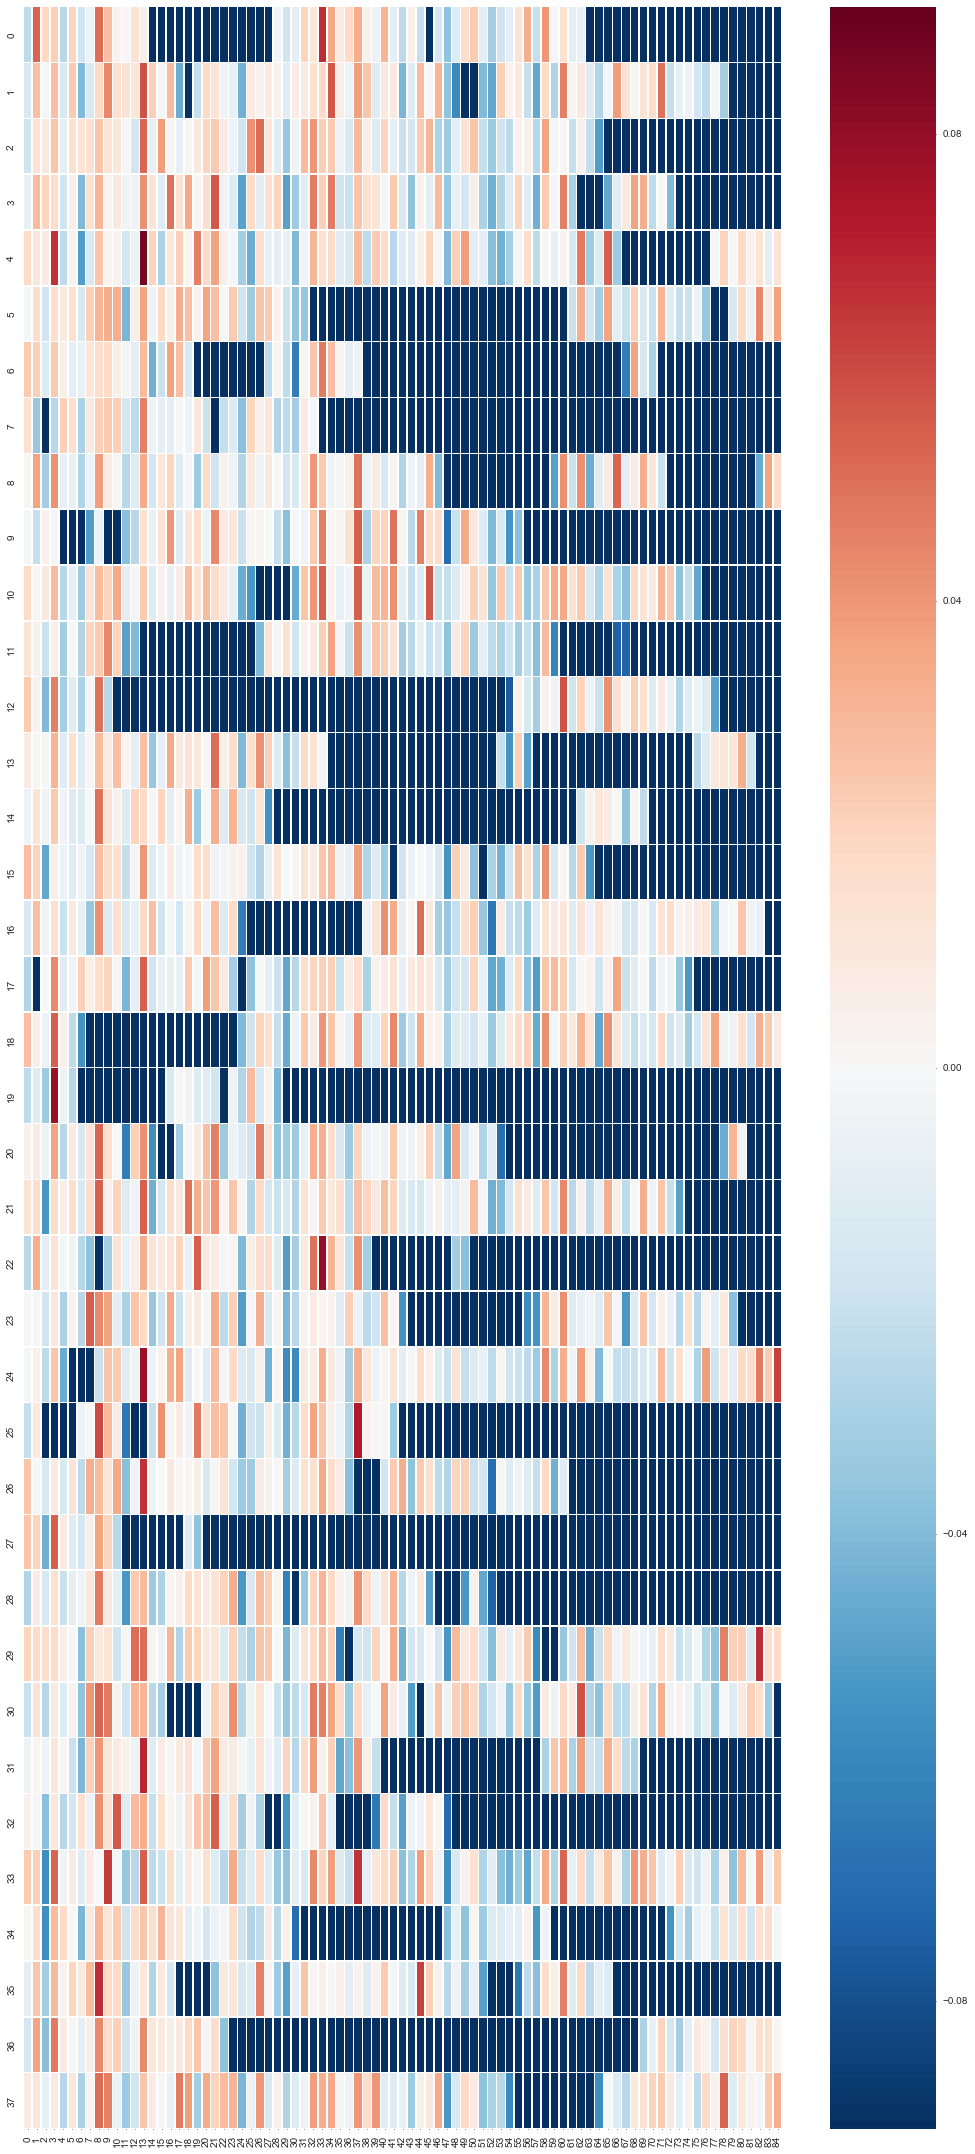

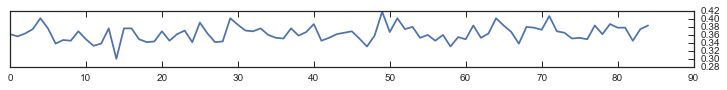

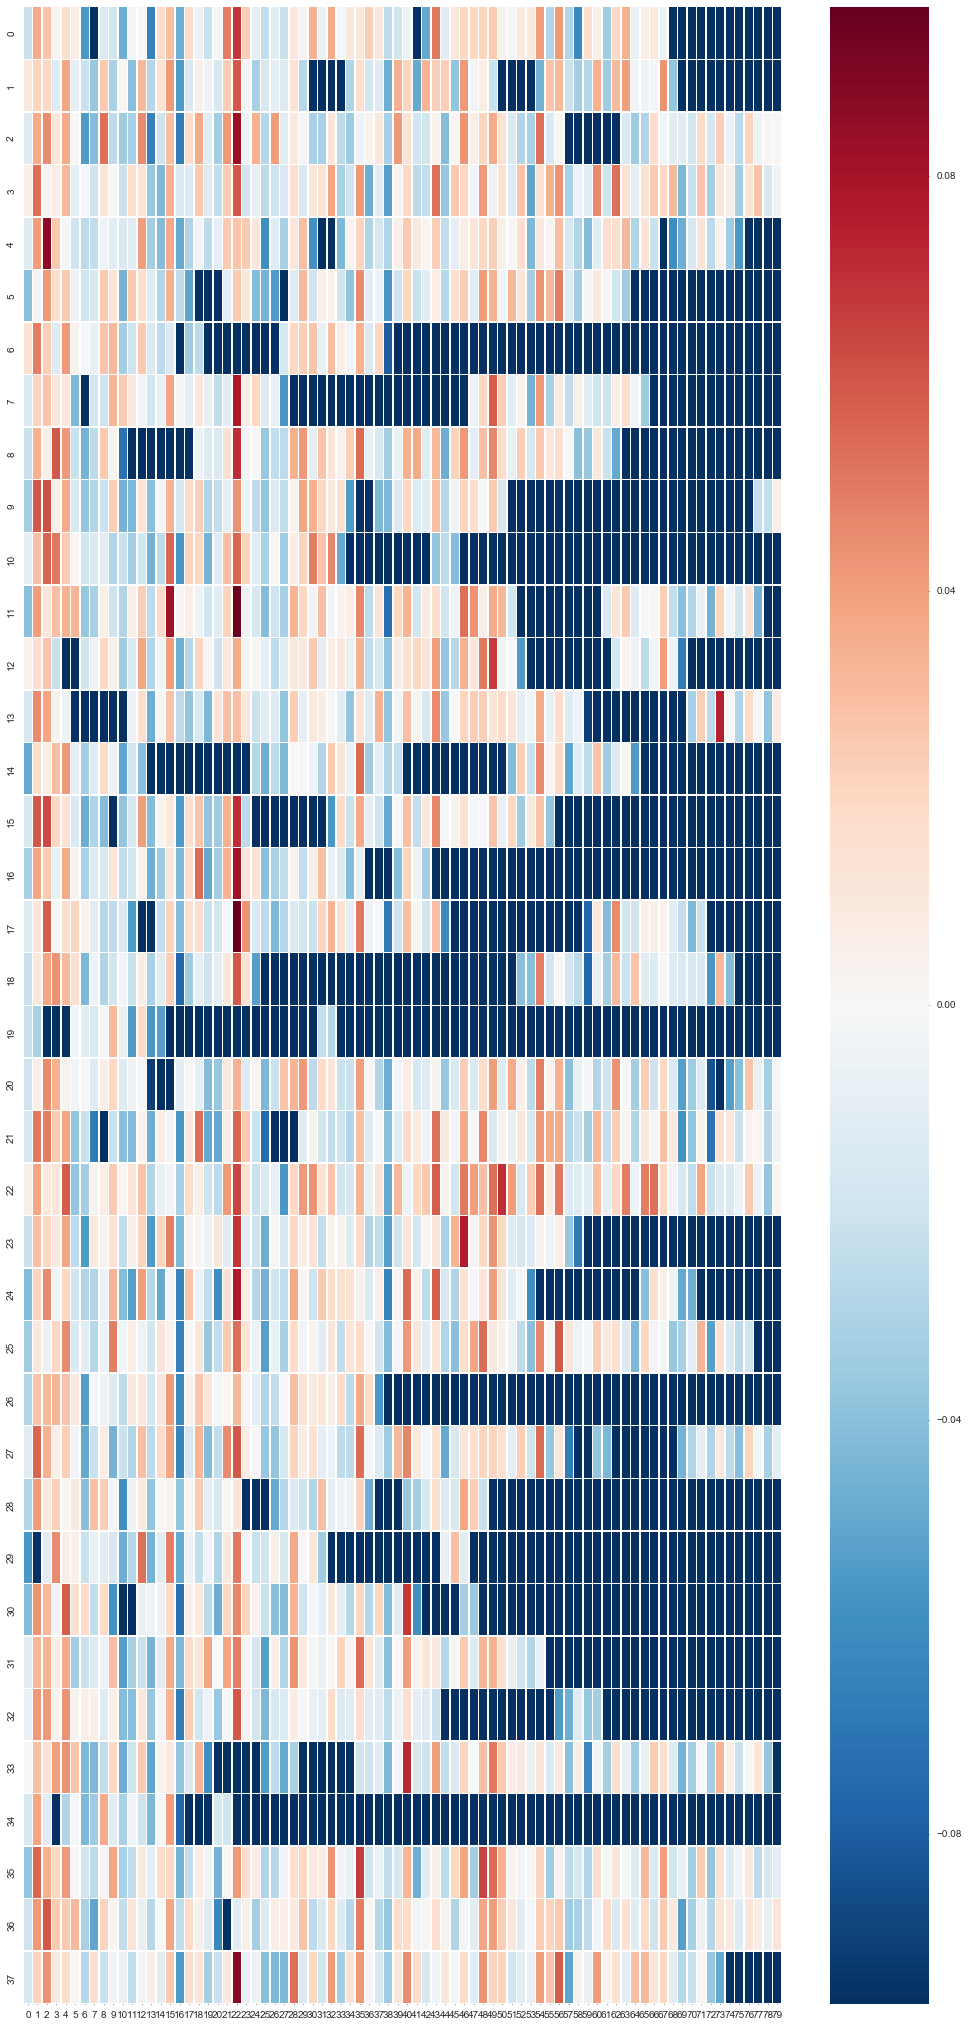

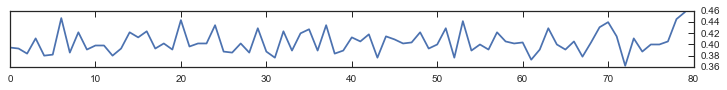

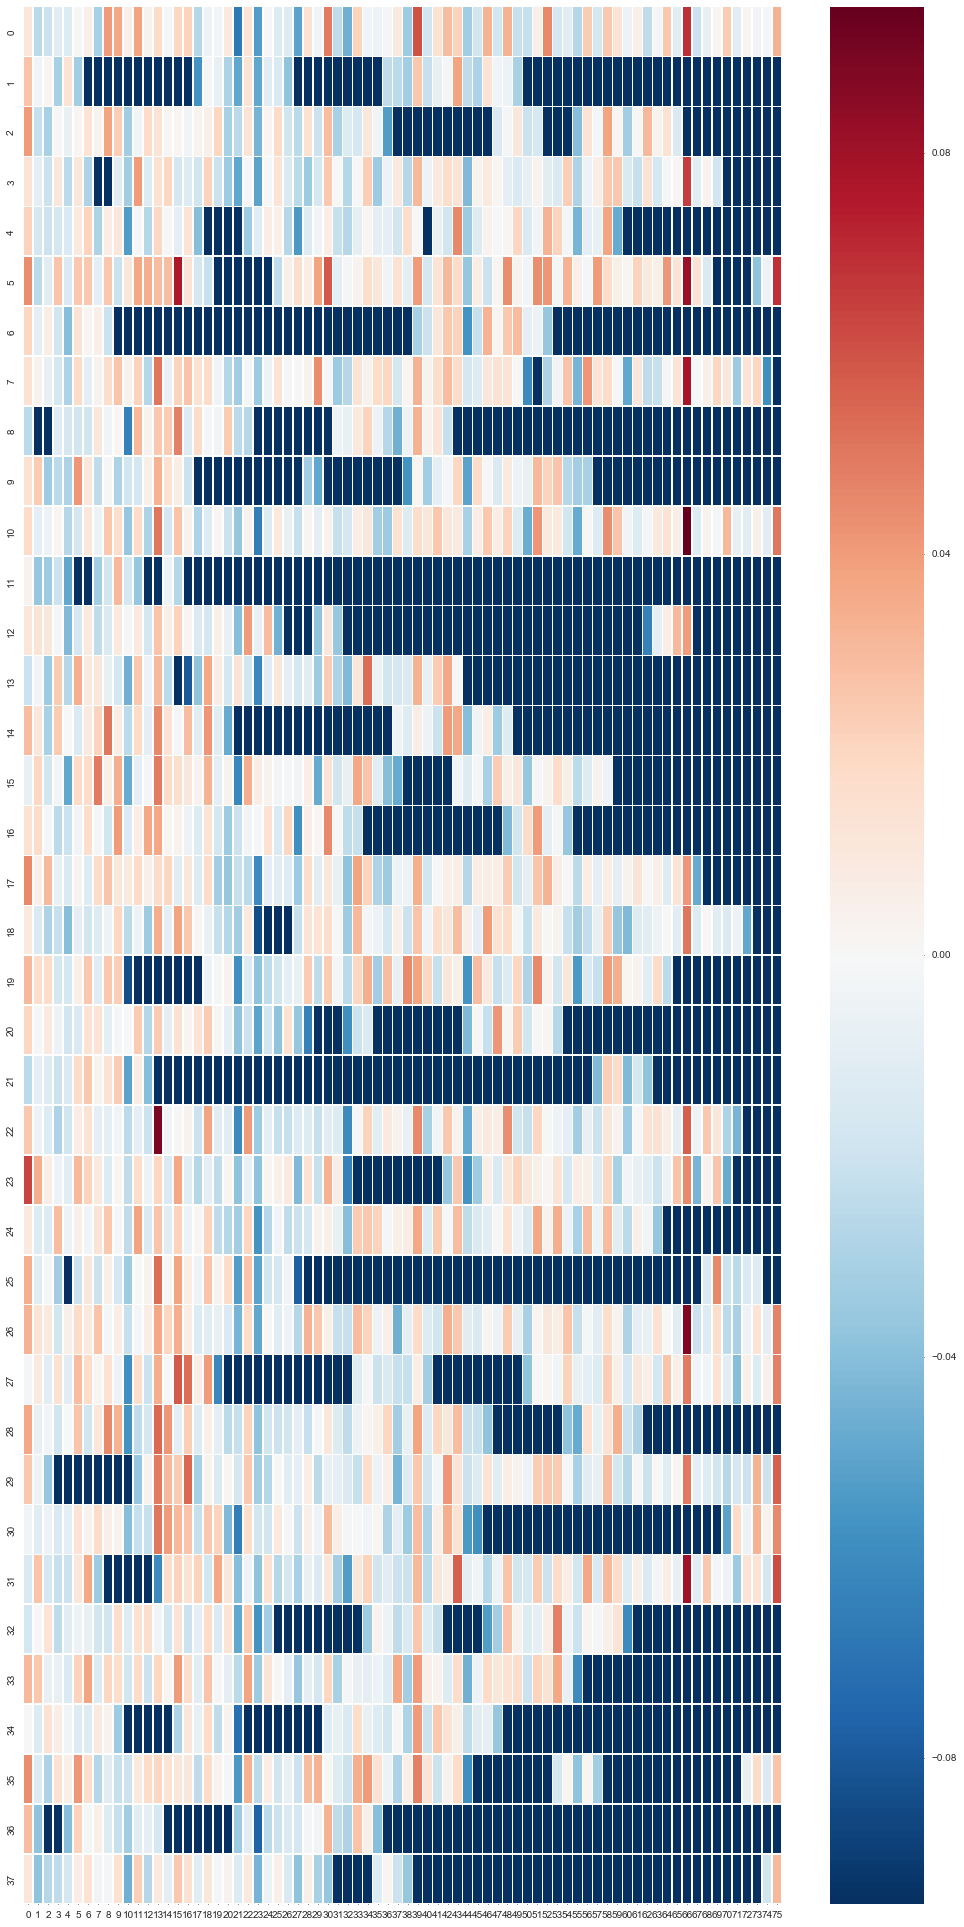

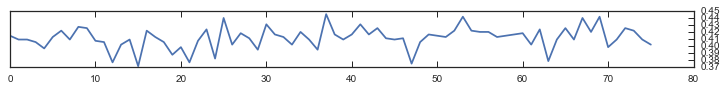

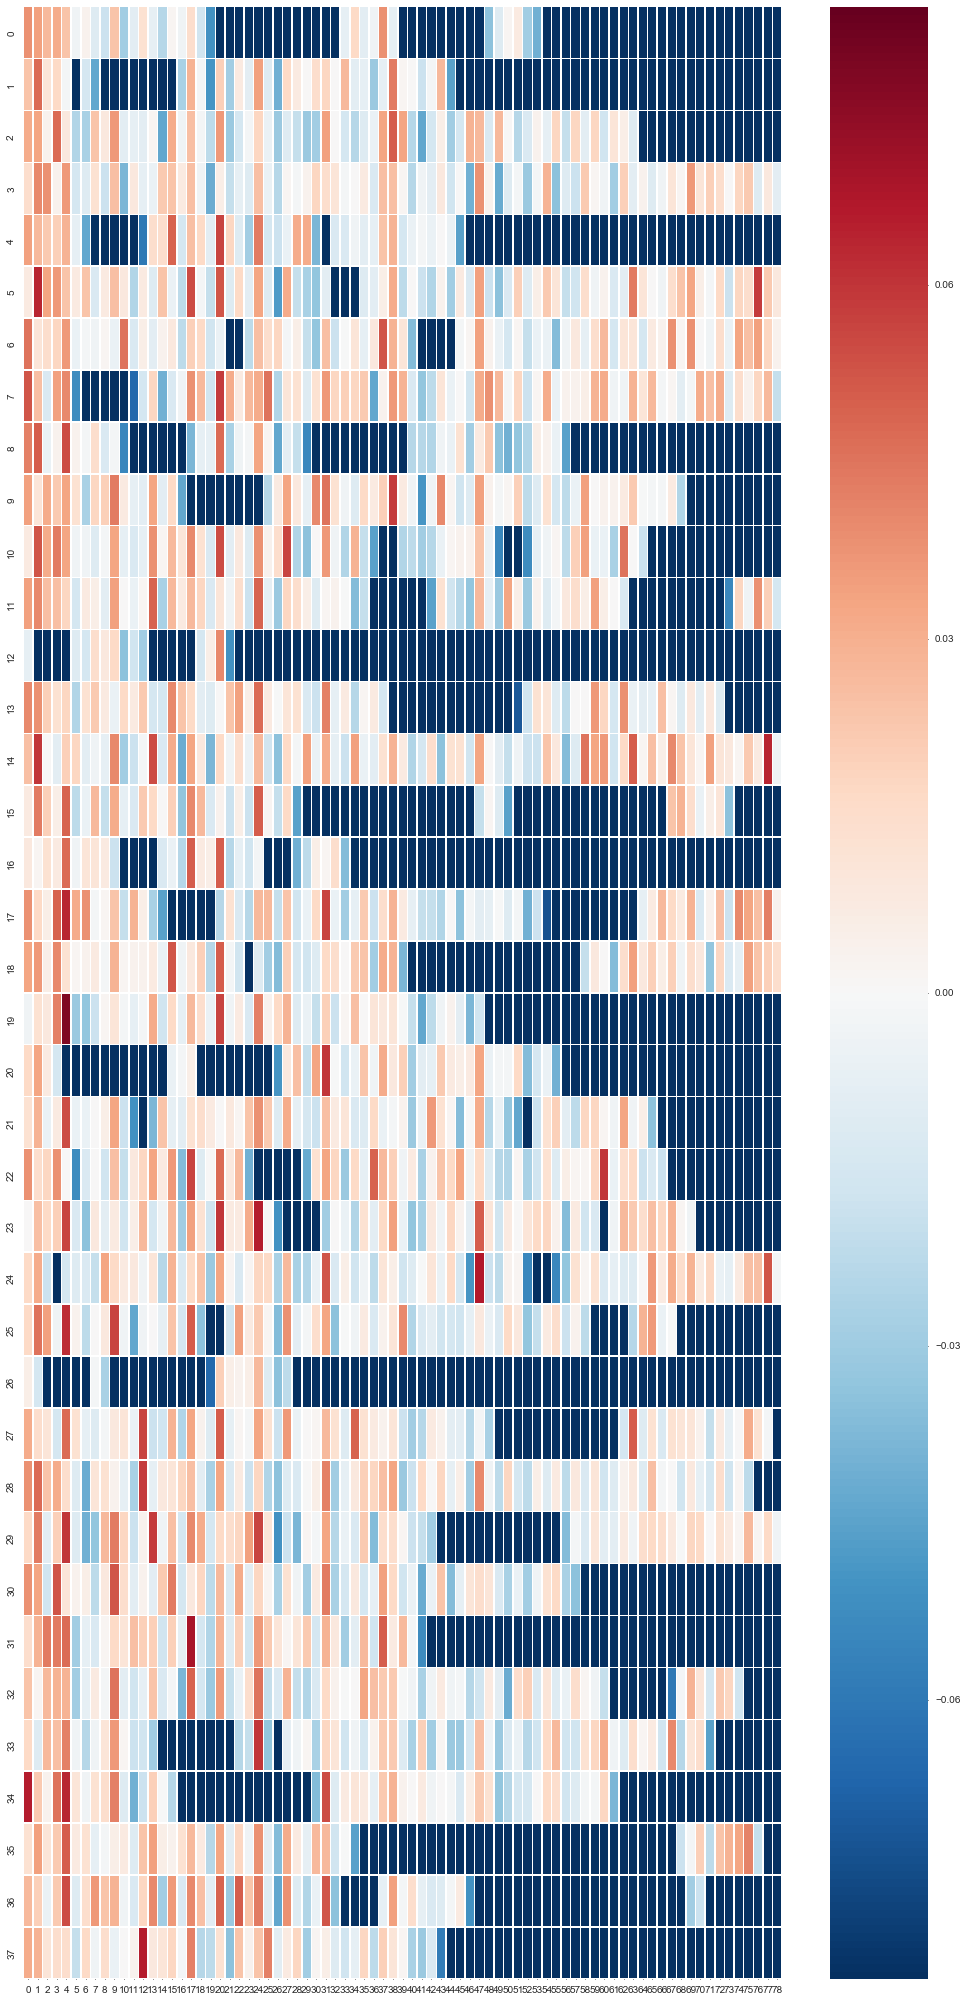

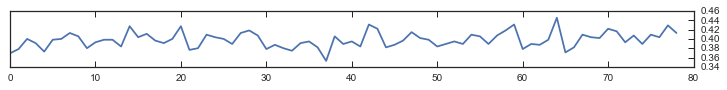

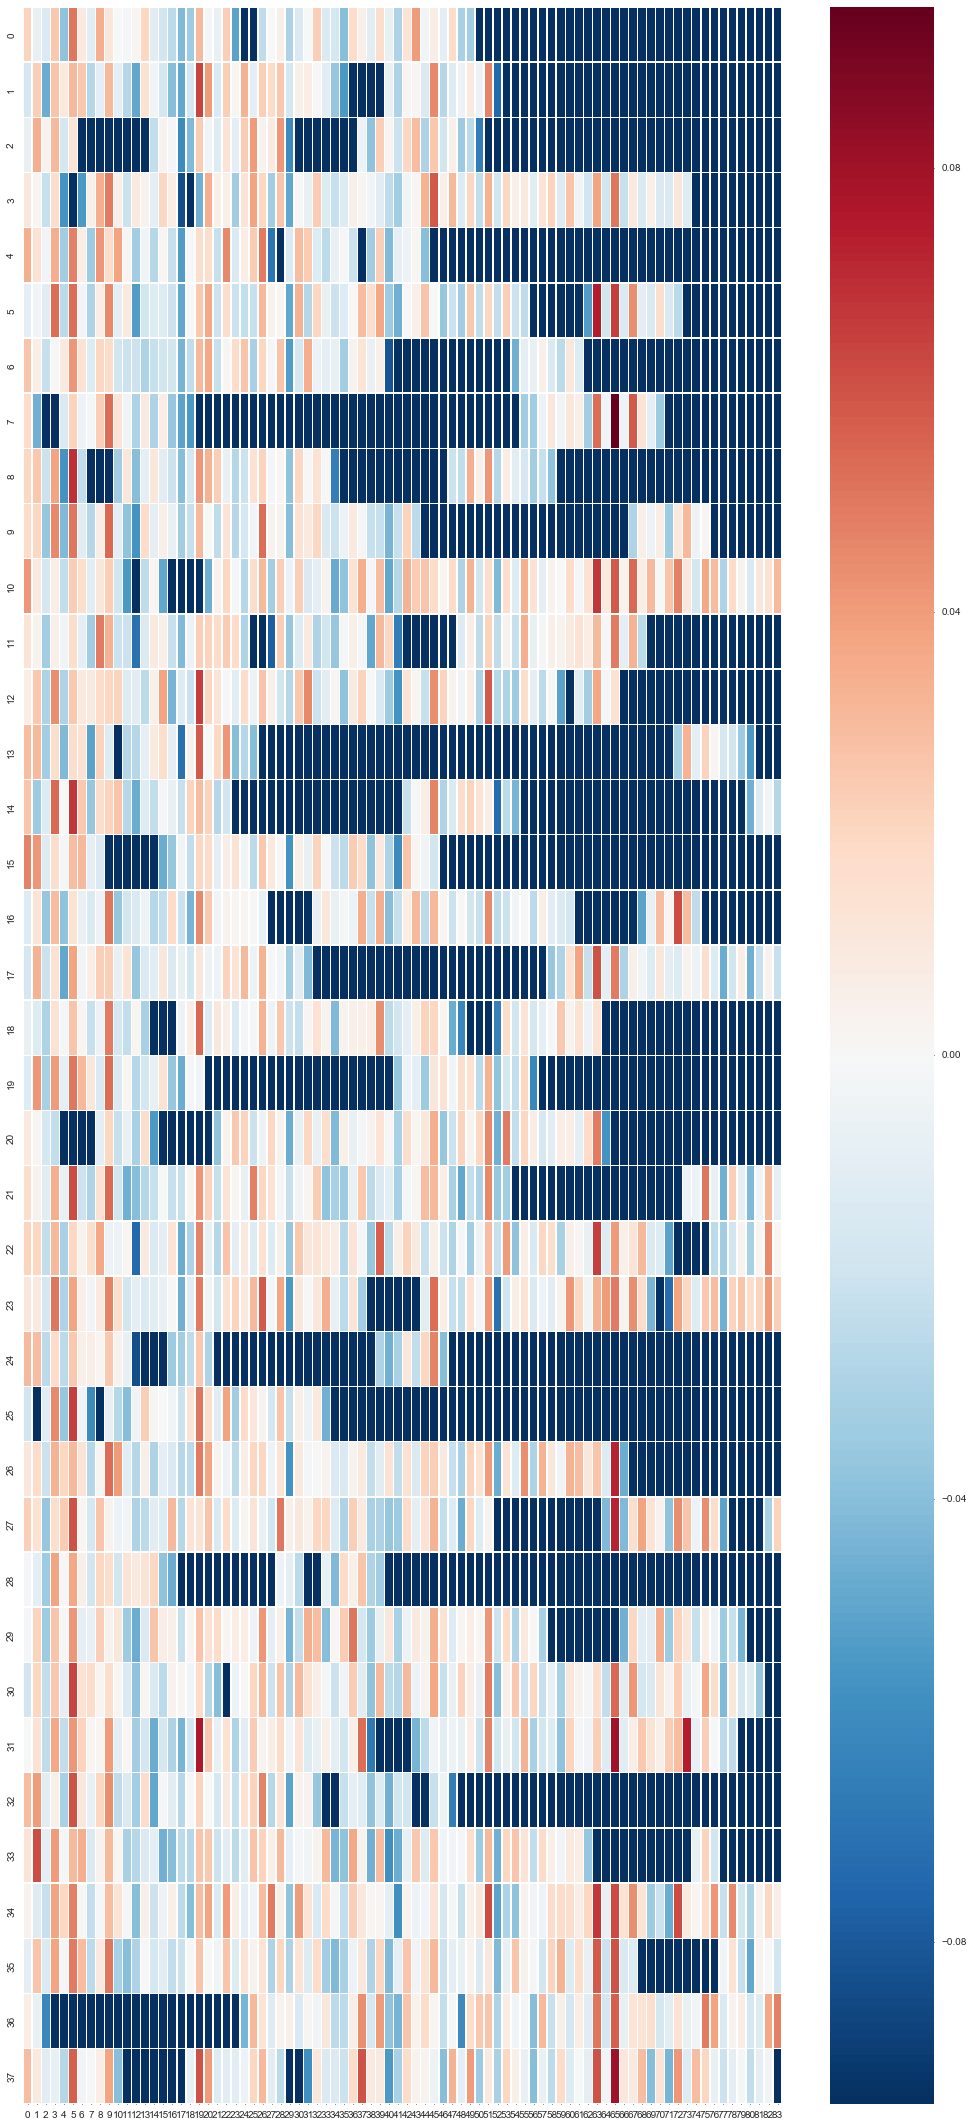

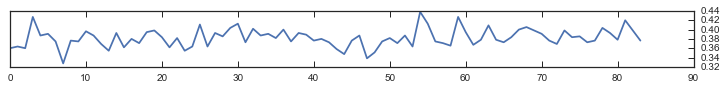

In [20]:
result = {}

for target in range(5):
    result[target] = backwards_forwards_feature_selection(Xtz, Y[:, target], classifier_score)